In [2]:
# importando as bibliotecas e ferramentas necessárias

import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline 
import datetime
import scipy.stats as stats
from datetime import datetime

In C:\Users\Fernando\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Fernando\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Fernando\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Fernando\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Fernando\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_c

In [6]:
# A função a seguir é responsável por alterar a granularidade de tempo de hora a hora para dia a dia.
# Além disso ela também adiciona as colunas de mes e ano.
# Para criar as colunas mes e ano, a coluna din_instante foi alterada do tipo object para datetime.

# A EDA será realizada com a granularidade dia a dia, porém o modelo de previsão em sí será feito mes a mes.

def processar_base_dados(GERACAO_USINA):
    # Convertendo a coluna 'din_instante' para o tipo datetime
    GERACAO_USINA['din_instante'] = pd.to_datetime(GERACAO_USINA['din_instante'], errors='coerce')
    
    # Extraindo o mês e ano da coluna de data e hora e criando a coluna 'Data'
    #GERACAO_USINA['Data'] = GERACAO_USINA['din_instante'].dt.strftime('%Y-%m')

    # Extraindo o mês da coluna de data e hora e criando a coluna 'Mes'
    GERACAO_USINA['Mes'] = GERACAO_USINA['din_instante'].dt.month
    
    # Extraindo o ano da coluna de data e hora e criando a coluna 'Ano'
    GERACAO_USINA['Ano'] = GERACAO_USINA['din_instante'].dt.year
    
    # Selecionando todas as colunas exceto 'din_instante', 'val_geracao', 'Mes' e 'ceg'
    colunas_selecionadas = GERACAO_USINA.columns.difference(['din_instante', 'val_geracao', 'Mes', 'ceg'])
    
    # Agrupando os dados por mês, ceg e as outras colunas selecionadas, somando a energia gerada
    GERACAO_USINA_AGR = GERACAO_USINA.groupby(['Mes', 'ceg'] + colunas_selecionadas.tolist(), as_index=False).sum()
    
    return GERACAO_USINA_AGR

# Nesta etapa criei um loop para importar as bases, chamar a função de processamento e em seguida concatenar em apenas uma.

GERACAO_USINA_ALL = []

for ano in range(2000, 2021):
    nome_arquivo = f"GERACAO_USINA_{ano}.csv"
    GERACAO_USINA = pd.read_csv(nome_arquivo, sep=';')
    GERACAO_USINA = processar_base_dados(GERACAO_USINA)
    GERACAO_USINA_ALL.append(GERACAO_USINA)
    

GERACAO_USINA_ALL = pd.concat(GERACAO_USINA_ALL, ignore_index=True,  sort=False)




# Verificando as primeiras linhas da base GERACAO_USINA_ALL
GERACAO_USINA_ALL.head(3)


,Mes,ceg,Ano,cod_modalidadeoperacao,id_estado,id_subsistema,nom_estado,nom_subsistema,nom_tipocombustivel,nom_tipousina,nom_usina,val_geracao,id_ons
0,1,-,2000,Pequenas Usinas (Tipo III),BA,NE,BAHIA,NORDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Chesf,21135.5,NaN
1,1,-,2000,Pequenas Usinas (Tipo III),DF,SE,DISTRITO FEDERAL,SUDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Ceb,15673.3,NaN
2,1,-,2000,Pequenas Usinas (Tipo III),ES,SE,ESPIRITO SANTO,SUDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Escelsa,70022.2,NaN


In [25]:
#criando uma coluna chamada Data, possuindo o ano e o mes juntos

GERACAO_USINA_ALL['Data'] = GERACAO_USINA_ALL['Ano'].astype(str) + '-' + GERACAO_USINA_ALL['Mes'].astype(str).str.zfill(2)


In [28]:
#Verificando se todos os anos foram importados
print(GERACAO_USINA_ALL.Ano.unique())

print('\n')

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]




In [29]:
# Convertendo a coluna 'din_instante' para o tipo datetime
GERACAO_USINA_ALL['Data'] = pd.to_datetime(GERACAO_USINA_ALL['Data'], errors='coerce')

GERACAO_USINA_ALL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74916 entries, 0 to 74915
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Mes                     74916 non-null  int64         
 1   ceg                     74916 non-null  object        
 2   Ano                     74916 non-null  int64         
 3   cod_modalidadeoperacao  74916 non-null  object        
 4   id_estado               74916 non-null  object        
 5   id_subsistema           74916 non-null  object        
 6   nom_estado              74916 non-null  object        
 7   nom_subsistema          74916 non-null  object        
 8   nom_tipocombustivel     74916 non-null  object        
 9   nom_tipousina           74916 non-null  object        
 10  nom_usina               74916 non-null  object        
 11  val_geracao             74916 non-null  float64       
 12  id_ons                  8142 non-null   object

In [14]:
# Como próxima etapa, é necessário realizar a sanitização e exploração dos dados 
# Portanto irei verificar alguns campos para identificar possíveis inconformidades e padrões.

# Contar a quantidade de ocorrências de cada valor único na coluna 'ceg'
contagem_valores = GERACAO_USINA_ALL['ceg'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'ceg':")
for ceg, count in contagem_valores.items():
    print(f"CEG: {ceg}, Contagem: {count}")
    
# verificando a existencia de valores nulos    
valores_nulos = GERACAO_USINA_ALL['ceg'].isnull().sum()

print("Número de valores nulos na coluna 'ceg':", valores_nulos)    

Contagem de ocorrências de cada valor único na coluna 'ceg':
CEG: -, Contagem: 11672
CEG: ND, Contagem: 1036
CEG: UTE.PE.AM.002952-1.01, Contagem: 600
CEG: UHE.PH.PR.001161-4.01, Contagem: 504
CEG: UHE.PH.SP.001084-7.01, Contagem: 504
CEG: UTE.PE.AM.029192-7.01, Contagem: 360
CEG: UHE.PH.MT.027244-2.01, Contagem: 290
CEG: UHE.PH.SP.001097-9.01, Contagem: 252
CEG: UHE.PH.SP.001552-0.01, Contagem: 252
CEG: UHE.PH.SP.001328-5.01, Contagem: 252
CEG: UHE.PH.SP.001285-8.01, Contagem: 252
CEG: UHE.PH.SP.001282-3.01, Contagem: 252
CEG: UHE.PH.SP.001225-4.01, Contagem: 252
CEG: UHE.PH.SP.001120-7.01, Contagem: 252
CEG: UHE.PH.SP.001098-7.01, Contagem: 252
CEG: UHE.PH.SP.000208-9.01, Contagem: 252
CEG: UHE.PH.SP.000588-6.01, Contagem: 252
CEG: UHE.PH.SP.002158-0.01, Contagem: 252
CEG: UHE.PH.SP.000923-7.01, Contagem: 252
CEG: UHE.PH.SP.000917-2.01, Contagem: 252
CEG: UHE.PH.SP.000203-8.01, Contagem: 252
CEG: UHE.PH.SP.000764-1.01, Contagem: 252
CEG: UHE.PH.SP.000657-2.01, Contagem: 252
CEG: UHE.

CEG: UTE.GN.SE.032228-8.01, Contagem: 13
CEG: UHE.PH.GO.002537-2.01, Contagem: 12
CEG: UHE.PH.PR.032923-1.01, Contagem: 9
CEG: UTE.AI.SP.029203-6.01, Contagem: 6
CEG: UTE.AI.SP.030445-0.01, Contagem: 6
CEG: UTE.AI.MS.030044-6.01, Contagem: 5
CEG: UTE.FL.RO.029243-5.01, Contagem: 5
CEG: UTE.PE.AP.049990-0.01, Contagem: 2
CEG: UTE.PE.AP.049991-9.01, Contagem: 2
CEG: PCH.PH.PA.028671-0.01, Contagem: 2
CEG: PCH.PH.PR.001278-5.01, Contagem: 2
CEG: EOL.CV.BA.031667-9.01, Contagem: 2
CEG: EOL.CV.BA.030944-3.01, Contagem: 2
CEG: EOL.CV.CE.030279-1.01, Contagem: 2
CEG: PCH.PH.PA.028653-2.01, Contagem: 1
CEG: UTE.FL.MS.030583-9.01, Contagem: 1
CEG: UTE.PE.AP.049992-7.01, Contagem: 1
Número de valores nulos na coluna 'ceg': 0


In [15]:

# Entendendo melhor os dados da coluna ceg com valor ND

linhas_ND = GERACAO_USINA_ALL.loc[GERACAO_USINA_ALL['ceg'] == 'ND']

# Contar a quantidade de ocorrências de cada valor único na coluna 'nom_tipousina'
contagem_valores = linhas_ND['nom_tipousina'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'nom_tipousina':")
for nom_tipousina, count in contagem_valores.items():
    print(f"nom_tipousina: {nom_tipousina}, Contagem: {count}")
    
    
print('\n')

# Contar a quantidade de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao'    
contagem_valores = linhas_ND['cod_modalidadeoperacao'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao':")
for cod_modalidadeoperacao, count in contagem_valores.items():
    print(f"cod_modalidadeoperacao: {cod_modalidadeoperacao}, Contagem: {count}")
        
print('\n')

# Verificando informações sobre os valores de geração das usinas ND 
print(linhas_ND['val_geracao'].describe())

print('\n')

print('Porcentagem da geração de usinas ND em relação ao total gerado :')
print((linhas_ND['val_geracao'].sum()/GERACAO_USINA_ALL['val_geracao'].sum()*100))

print('\n')

print('Porcentagem de usinas com ceg = ND em relação ao total de dados na coluna ceg :')
print((GERACAO_USINA_ALL['ceg'].value_counts()['ND']/GERACAO_USINA_ALL['ceg'].count()*100))

print('\n')

# Verificando as primeiras linhas da base linhas_ND    
linhas_ND.head(3)

Contagem de ocorrências de cada valor único na coluna 'nom_tipousina':
nom_tipousina: HIDROELÉTRICA, Contagem: 829
nom_tipousina: TÉRMICA, Contagem: 182
nom_tipousina: BOMBEAMENTO, Contagem: 25


Contagem de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao':
cod_modalidadeoperacao: TIPO III, Contagem: 881
cod_modalidadeoperacao: TIPO I, Contagem: 155


count      1036.000000
mean      11941.438003
std       18046.223658
min           0.000000
25%           0.000000
50%         768.415000
75%       18380.695500
max      109315.570000
Name: val_geracao, dtype: float64


Porcentagem da geração de usinas ND em relação ao total gerado :
0.12695124770094918


Porcentagem de usinas com ceg = ND em relação ao total de dados na coluna ceg :
1.3828821613540498




,Mes,ceg,Ano,cod_modalidadeoperacao,id_estado,id_subsistema,nom_estado,nom_subsistema,nom_tipocombustivel,nom_tipousina,nom_usina,val_geracao,id_ons,Data
2449,10,ND,2001,TIPO III,BA,NE,BAHIA,NORDESTE,Gás,TÉRMICA,USI Companhia Petroquimica Do Nordeste,6787.00,NaN,2001-10-01
2573,11,ND,2001,TIPO III,BA,NE,BAHIA,NORDESTE,Gás,TÉRMICA,USI Companhia Petroquimica Do Nordeste,10499.28,NaN,2001-11-01
2701,12,ND,2001,TIPO III,BA,NE,BAHIA,NORDESTE,Gás,TÉRMICA,USI Companhia Petroquimica Do Nordeste,9552.00,NaN,2001-12-01


In [16]:
# Entendendo melhor os dados da coluna ceg com valor - 

linhas_dash = GERACAO_USINA_ALL.loc[GERACAO_USINA_ALL['ceg'] == '-']

# Contar a quantidade de ocorrências de cada valor único na coluna 'nom_tipousina'
contagem_valores = linhas_dash['nom_tipousina'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'nom_tipousina':")
for nom_tipousina, count in contagem_valores.items():
    print(f"nom_tipousina: {nom_tipousina}, Contagem: {count}")
    
print('\n')

# Contar a quantidade de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao'    
contagem_valores = linhas_dash['cod_modalidadeoperacao'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao':")
for cod_modalidadeoperacao, count in contagem_valores.items():
    print(f"cod_modalidadeoperacao: {cod_modalidadeoperacao}, Contagem: {count}")
    
print('\n')

# Verificando informações sobre os valores de geração das usinas ND 
print(linhas_dash['val_geracao'].describe())

print('\n')

print('Porcentagem da geração de usinas - em relação ao total gerado :')
print((linhas_dash['val_geracao'].sum()/GERACAO_USINA_ALL['val_geracao'].sum()*100))

print('\n')

print('Porcentagem de usinas com ceg = - em relação ao total de dados na coluna ceg :')
print((GERACAO_USINA_ALL['ceg'].value_counts()['-']/GERACAO_USINA_ALL['ceg'].count()*100))

print('\n')

# Verificando as primeiras linhas da base linhas_dash        
linhas_dash.head(3)

Contagem de ocorrências de cada valor único na coluna 'nom_tipousina':
nom_tipousina: EOLIELÉTRICA, Contagem: 5524
nom_tipousina: HIDROELÉTRICA, Contagem: 4416
nom_tipousina: TÉRMICA, Contagem: 1132
nom_tipousina: FOTOVOLTAICA, Contagem: 600


Contagem de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao':
cod_modalidadeoperacao: Conjunto de Usinas, Contagem: 7253
cod_modalidadeoperacao: Pequenas Usinas (Tipo III), Contagem: 4419


count     11672.000000
mean      38974.397212
std       45401.933392
min           0.000000
25%       13387.891500
50%       27321.256000
75%       48602.019000
max      454401.042000
Name: val_geracao, dtype: float64


Porcentagem da geração de usinas - em relação ao total gerado :
4.66815508637944


Porcentagem de usinas com ceg = - em relação ao total de dados na coluna ceg :
15.58011639703134




,Mes,ceg,Ano,cod_modalidadeoperacao,id_estado,id_subsistema,nom_estado,nom_subsistema,nom_tipocombustivel,nom_tipousina,nom_usina,val_geracao,id_ons,Data
0,1,-,2000,Pequenas Usinas (Tipo III),BA,NE,BAHIA,NORDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Chesf,21135.5,NaN,2000-01-01
1,1,-,2000,Pequenas Usinas (Tipo III),DF,SE,DISTRITO FEDERAL,SUDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Ceb,15673.3,NaN,2000-01-01
2,1,-,2000,Pequenas Usinas (Tipo III),ES,SE,ESPIRITO SANTO,SUDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Escelsa,70022.2,NaN,2000-01-01


In [17]:
# Verificando as outras colunas da base GERACAO_USINA_ALL

# Contar a quantidade de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao'
contagem_valores = GERACAO_USINA_ALL['cod_modalidadeoperacao'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao':")
for cod_modalidadeoperacao, count in contagem_valores.items():
    print(f"cod_modalidadeoperacao: {cod_modalidadeoperacao}, Contagem: {count}")
    
# verificando a existencia de valores nulos    
valores_nulos = GERACAO_USINA_ALL['cod_modalidadeoperacao'].isnull().sum()

print("Número de valores nulos na coluna 'cod_modalidadeoperacao':", valores_nulos) 

# Nenhuma inconformidade nesta coluna
# A pesar de existir o valor TIPO III e Pequenas Usinas (Tipo III) não posso afirmar que são da mesma modalidade
# portanto não posso agrupalos em um só valor.

print('\n')

# Contar a quantidade de ocorrências de cada valor único na coluna 'id_estado'
contagem_valores = GERACAO_USINA_ALL['id_estado'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'id_estado':")
for id_estado, count in contagem_valores.items():
    print(f"id_estado: {id_estado}, Contagem: {count}")
    
# verificando a existencia de valores nulos    
valores_nulos = GERACAO_USINA_ALL['id_estado'].isnull().sum()

print("Número de valores nulos na coluna 'id_estado':", valores_nulos) 

print('\n')

#Verificar quanto cada estado produz de energia em relação ao total produzido no brasil
producao_por_estado = GERACAO_USINA_ALL.groupby('id_estado')['val_geracao'].sum()
producao_total = producao_por_estado.sum()
porcentagem_por_estado = (producao_por_estado / producao_total) * 100
porcentagem_por_estado = porcentagem_por_estado.sort_values(ascending=False)
print(porcentagem_por_estado)

print('\n')

# Contar a quantidade de ocorrências de cada valor único na coluna 'nom_tipocombustivel'
contagem_valores = GERACAO_USINA_ALL['nom_tipocombustivel'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'nom_tipocombustivel':")
for nom_tipocombustivel, count in contagem_valores.items():
    print(f"nom_tipocombustivel: {nom_tipocombustivel}, Contagem: {count}")
    
# verificando a existencia de valores nulos    
valores_nulos = GERACAO_USINA_ALL['nom_tipocombustivel'].isnull().sum()

print("Número de valores nulos na coluna 'nom_tipocombustivel':", valores_nulos) 

print('\n')

# Contar a quantidade de ocorrências de cada valor único na coluna 'nom_tipousina'
contagem_valores = GERACAO_USINA_ALL['nom_tipousina'].value_counts()

print("Contagem de ocorrências de cada valor único na coluna 'nom_tipousina':")
for nom_tipousina, count in contagem_valores.items():
    print(f"nom_tipousina: {nom_tipousina}, Contagem: {count}")
    
# verificando a existencia de valores nulos    
valores_nulos = GERACAO_USINA_ALL['nom_tipousina'].isnull().sum()

print("Número de valores nulos na coluna 'nom_tipousina':", valores_nulos) 

print('\n')

print("Verificando informações sobre os valores de geração:")
print(GERACAO_USINA_ALL['val_geracao'].describe())

Contagem de ocorrências de cada valor único na coluna 'cod_modalidadeoperacao':
cod_modalidadeoperacao: TIPO I, Contagem: 46671
cod_modalidadeoperacao: TIPO III, Contagem: 7823
cod_modalidadeoperacao: Conjunto de Usinas, Contagem: 7253
cod_modalidadeoperacao: Pequenas Usinas (Tipo III), Contagem: 4419
cod_modalidadeoperacao: TIPO II-A, Contagem: 3816
cod_modalidadeoperacao: TIPO II-C, Contagem: 3445
cod_modalidadeoperacao: TIPO II-B, Contagem: 1489
Número de valores nulos na coluna 'cod_modalidadeoperacao': 0


Contagem de ocorrências de cada valor único na coluna 'id_estado':
id_estado: SP, Contagem: 10459
id_estado: MG, Contagem: 8288
id_estado: RS, Contagem: 7093
id_estado: BA, Contagem: 6764
id_estado: CE, Contagem: 4886
id_estado: GO, Contagem: 4609
id_estado: RJ, Contagem: 4065
id_estado: PR, Contagem: 3562
id_estado: RN, Contagem: 3407
id_estado: SC, Contagem: 3032
id_estado: MT, Contagem: 2673
id_estado: PE, Contagem: 2293
id_estado: MS, Contagem: 2272
id_estado: AM, Contagem: 

   Nesta primeira etapa foram feitos alguns tratamentos e coletadas informações em relação aos dados presentes nas bases de dados. Inicialmente foi necessário alterar o tipo da coluna 'Data' de object para datetime, pois para trabalhar com séries temporais e gráficos que estão em relação ao tempo, o campo Data deve estar com o tipo datetime.
   
   Posteriormente busquei verificar os campos presentes na base de dados para encontrar possíveis inconformidades e padrões. Ao verificar os dados da coluna 'Ceg' que são correspondentes ao Código Único do Empreendimento de Geração de cada usina, foi percebido uma grande quantidade de valores "-", que não possuem um código específico. Apesar dos valores '-' representarem cerca de 15% de todos os valores presentes na coluna 'ceg' eles são responsáveis somente por cerca de 5% do total de energia elétrica gerado. Isso se deve principalmente por essas usinas serem classificadas como pequenas usinas ou conjunto de usinas, e provavelmente por terem pouca capacidade de geração elas não possuem o código único registrado na ANEEL. Porém esses dados não irão causar problemas no projeto, pois posteriormente a previsão será feita em relação ao tipo de usina e não em relação ao ceg
   
   Outra observação encontrada na coluna 'ceg' foi a presença de valores 'ND', que também não possuem um código específico. Porém as usinas com o ceg igual a ND possuem uma baixa significancia pois são responsáveis somente por cerca de 0,13% do total de energia elétrica gerado, e representa cerca de 1,4% de todos os valores presentes na coluna 'ceg'.
   
   Posteriormente fiz a verificação das colunas restantes na base de dados. Na coluna que possui os dados relativos ao estado de cada usina elétrica, foi levantado que os cinco estados que mais possuem usinas elétricas são SP,MG, RS, BA e CE, possuindo cerca de 14%, 11%, 9.5%, 9% e 6.5% respectivamente, totalizando 50% de todas as usinas do Brasil. Porém algo interessante a se destacar é que com exceção de MG e SP os outros três estados com maior número de usinas não fazem parte dos cinco estado que mais produzem energia no Brasil, sendo eles PR, SP, MG, PA e I, sendo I correspondente a 'Internacional'. Cada um deles representam cerca de 17%, 14%, 12%, 8% e 8% respectivamente, totalizando 59% de toda energia produzida no Brasil. Isso demonstra que o país ainda possui uma grande dependência em relação a poucas usinas de energia, como Itaipu localizada no Paraná e Paraguai, assim como as usinas de Belo monte e Tapajós localizadas no Pará.
   
   Ao analisar a coluna relativa aos tipos de usina elétrica, foi percebido que cerca de 53% das usinas no Brasil são do tipo Hidroelétricas. Isso demonstra mais uma vez a dependência do país em relação a um único modelo de produção de energia, e isso não é positivo, pois esse modelo pode ser afetado por épocas de seca e além disso a implantação desse modelo geralmente causa grandes impactos ambientais na região onde é instalado.
   
   Por último, ao análisar os valores gerados pelas usinas, foi percebido uma grande desvio padrão nesse conjunto de dados, isso demonstra que existem pequenas quantidades de usinas que são responsáveis por um grande volume de geração de energia. Foi observado que até 50% de todas as usinas do Brasil produzem um valor mensal de energia inferior a 28885kw, sendo que a usina de maior produção mensal chega a um valor de 6505332kw.
   
   

Text(0.5, 1.0, 'Histograma dos valores de geração de energia')

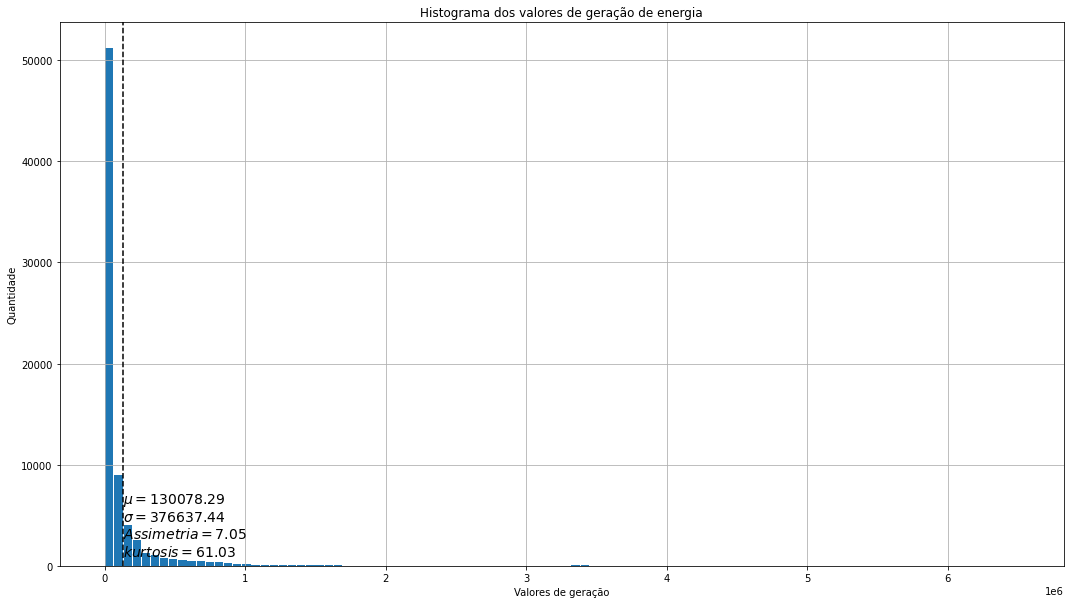

In [18]:
#criando um histograma dos valores de geração de energia na base GERACAO_USINA_ALL 

media = GERACAO_USINA_ALL['val_geracao'].mean()
std = GERACAO_USINA_ALL['val_geracao'].std()
skew = GERACAO_USINA_ALL['val_geracao'].skew()
kurt = GERACAO_USINA_ALL['val_geracao'].kurtosis()

text1 = '$\mu=$' + str(round(media,2))
text2 = '$\sigma=$' +str(round(std,2))
text3 = '$Assimetria=$' + str(round(skew,2))
text4 = '$kurtosis=$' + str(round(kurt,2))
text = text1 + "\n" + text2 + "\n" + text3 + "\n" + text4

GERACAO_USINA_ALL.hist(column = "val_geracao", bins = 100, figsize=(18,10), rwidth=0.9)
plt.axvline(media, color='k', linestyle='--')
plt.text(media+10, 1000, text, fontsize=14)
plt.xlabel("Valores de geração")
plt.ylabel("Quantidade")
plt.title("Histograma dos valores de geração de energia")

# é possível perceber que a distribuição dos valores de geração seguem um fotmato exponencial
# isso se deve pois essa base traz os valores gerados em relação a cada usina, 
# e existem usinas que produzem bem mais que outras 

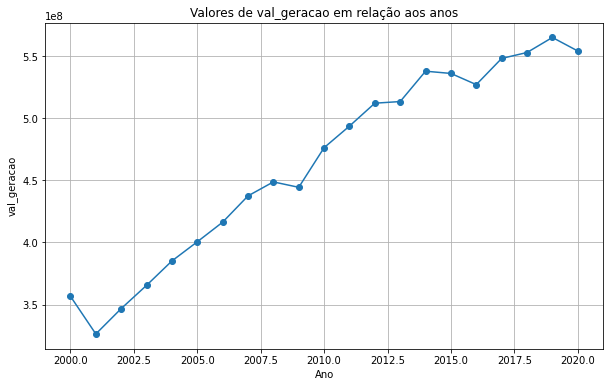

In [19]:
# Criando um gráfico dos valores gerados de energia em relação a cada ano
# Criando a base geracao_ano , que traz a soma dos valores gerados a cada ano

geracao_ano = GERACAO_USINA_ALL.groupby(['Ano'])['val_geracao'].sum().reset_index()


# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(geracao_ano['Ano'], geracao_ano['val_geracao'], marker='o', linestyle='-')

# Definir o título e os rótulos dos eixos
plt.title('Valores de val_geracao em relação aos anos')
plt.xlabel('Ano')
plt.ylabel('val_geracao')

# Exibir o gráfico
plt.grid(True)
plt.show()


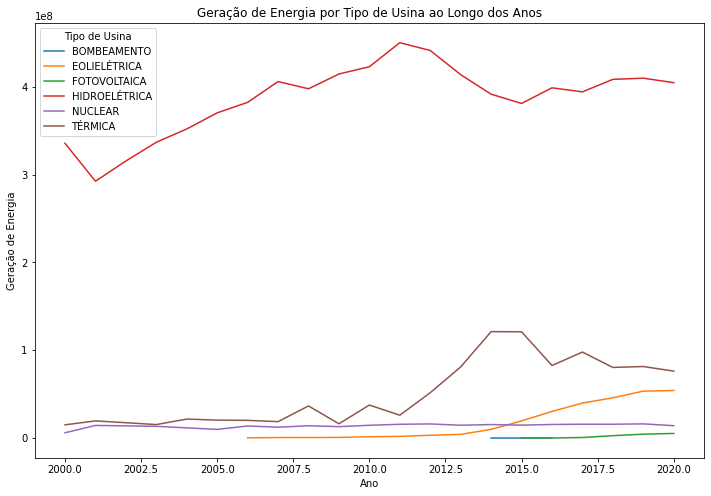

In [20]:
geracao_ano_tipousina = GERACAO_USINA_ALL.groupby(['Ano', 'nom_tipousina'])['val_geracao'].sum().reset_index()
geracao_ano_tipousina = geracao_ano_tipousina.pivot_table(index='Ano', columns='nom_tipousina', values='val_geracao', aggfunc='sum')

geracao_ano_tipousina.plot(kind='line', figsize=(12, 8))

# Adicionar legenda
plt.legend(title='Tipo de Usina')

# Adicionar rótulos
plt.xlabel('Ano')
plt.ylabel('Geração de Energia')
plt.title('Geração de Energia por Tipo de Usina ao Longo dos Anos')

# Exibir o gráfico
plt.show()

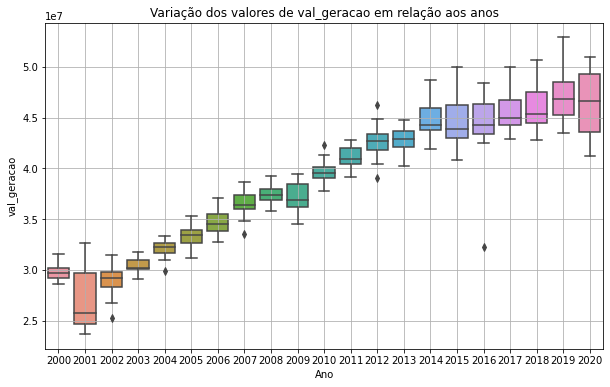

In [21]:
# Criando um gráfico dos valores gerados de energia em relação a cada ano porém demonstrando a variação dentro do ano
# Criando a base geracao_mes , que traz a soma dos valores gerados a cada mes e seus respectivos anos

geracao_mes = GERACAO_USINA_ALL.groupby(['Ano', 'Mes'])['val_geracao'].sum().reset_index()

# Criar o gráfico de boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ano', y='val_geracao', data=geracao_mes)

# Definir o título e os rótulos dos eixos
plt.title('Variação dos valores de val_geracao em relação aos anos')
plt.xlabel('Ano')
plt.ylabel('val_geracao')

# Exibir o gráfico
plt.grid(True)
plt.show()

In [24]:
GERACAO_USINA_ALL.head()

,Mes,ceg,Ano,cod_modalidadeoperacao,id_estado,id_subsistema,nom_estado,nom_subsistema,nom_tipocombustivel,nom_tipousina,nom_usina,val_geracao,id_ons,Data
0,1,-,2000,Pequenas Usinas (Tipo III),BA,NE,BAHIA,NORDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Chesf,21135.5,NaN,2000-01-01
1,1,-,2000,Pequenas Usinas (Tipo III),DF,SE,DISTRITO FEDERAL,SUDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Ceb,15673.3,NaN,2000-01-01
2,1,-,2000,Pequenas Usinas (Tipo III),ES,SE,ESPIRITO SANTO,SUDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Escelsa,70022.2,NaN,2000-01-01
3,1,-,2000,Pequenas Usinas (Tipo III),GO,SE,GOIAS,SUDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidroelétricas da Celg,5788.1,NaN,2000-01-01
4,1,-,2000,Pequenas Usinas (Tipo III),MG,SE,MINAS GERAIS,SUDESTE,Hidráulica,HIDROELÉTRICA,Pequenas Centrais Hidrelétricas da Cemig,62331.5,NaN,2000-01-01


   Nesta etapa foram realizadas análises em relação as informações exibidas nos gráficos. No primeiro grafico que possui informações sobre o valor gerado de energia a cada ano no Brasil, é possível perceber um aumento na produção de energia conforme o avançar dos anos, demonstrando uma tendência de aumento de geração de energia, o que indica que o país possui um constante investimento em usinas de energia.
   
   Porém ao analisar o segundo gráfico é possível perceber que esse investimento está concentrado em poucos modelos de produção de energia, pois ao passar dos anos a principal matriz energética ainda continua como hidroelétrica. Apesar disso também é possível perceber que aos poucos os investimentos em modelos como eolielétricos e fotovoltaicos estão ganhando espaço, a partir do ano de 2014 o modelo eolielétricos teve um grande aumento de produção. Um ponto que pode ser positivo para ajudar a fomentar o investimento em novos modelos de produção de energia, é a facilitação cada vez maior ao acesso no mercado livre de nergia, o governo está buscando diminuir as barreiras ao longo do tempo, para que novos consumidores consigam entrar no mercado livre de energia, e no futuro existe uma forte tendência que novas empresa privadas de produção de energia elétrica invistam em modelos sustentáveis como o fotovoltaico e o eolielétrico, para poder suprir a demanda de novos clientes que vão entra nesse mercado.
   
   No ultimo gráfico foi possível analisar a variação de produção de nergia dentro de cada ano. É possível perceber que de 2002 a 2013 houve pouca variação na produção de nergia em cada ano, demonstrando uma capacidade quase constante de produção de energia. A partir de 2014 é possível perceber uma maior variação de produção dentro dos anos, isso provavelmente se deve ao aumento de produção de energia por outras fontes além das hidroelétricas a partir desse ano, aumentando o número de fontes de produção de energia, o que também ajudou a aumentar a variação de valores de produção, com meses em que é produzido mais e outros menos.
   
   

   Nesta próxima etapa foi realizado a previsão dos valores de produção de energia para os anos de 2019 e 2020 em relação a cada tipo de usina elétrica. Foi decidido realizar a previsão em relação a cada tipo de usina, pois cada tipo de usina possui características diferentes de produção de energia, e análisar cada uma de forma individual ajuda a ter um melhor entendimento de como funciona a produção de energia no Brasil, quais modelos de usinas precisam de um maior investimento nos próximos anos e quais padrões de produção de energia estão presentes em cada tipo de usina.
   
   Nesta etapa foram criadas bases de dados referentes a cada tipo de usina, trazendo uma coluna com os valores de produção de energia, e o index com a data. Dessa forma foi percebido que a base relativa ao tipo Bombeamento possui um valor muito pequeno de linhas e grande parte desses valores está como 0, portanto foi decidio não utilizar essa base pois não seria pssível trazer bons resultados.
   
   Posteriormente as bases foram preparadas para poderem ser utilizadas pelo algoritmo de predição XGBoost. As bases foram separadas entre treinamento e teste, já que para algoritmos de aprendizado de máquina supervisionado é necessário treinar o modelo a partir dos dados possuidos. Em seguida foram criados gráficos que representam a produção de energia elétrica por cada tipo de usina elétrica ao longo dos anos, dessa forma foi possível identificar características de produção para cada tipo de usina. Por exemplo, a produção de energia realizada em hidroelétricas não apresenta um grande aumento ao longo dos anos, ela segue de forma horizontal no gráfico sem muita ascendência, apresentando maiores variações no volume de produção a partir de 2014.
   
   Ja no caso das usinas eolielétricas e fotovoltaicas, o gráfico apresenta uma tendência de crescimento ao longo dos anos, sendo que o crescimento se da a partir dos anos de 2014 e 2017 respectivamente, datas que estão próximas da data atual e que demonstra que esses tipos de usina ainda estão adquirindo maturidade e se estabelecendo no país. A fotovoltaica se comparada a eolielétrica aprsenta menos variação na produção e inclinação de crescimento maior, o que demonstra o potencial desse tipo de usina no Brasil, já que o país tropical possui uma ampla área que é possível captar a incidência de luz solar.
   
   No caso da usina nuclear, o gráfico apresenta uma característica incomun, os valores em cada ano apresentam  um padrão de variação que pode variar entre um valor máximo de 1.4e+06 até 0. Esse padrão se repete de forma constante ao longo dos anos, e isso permite deduzir que as usinas nucleares não funcionam em sua capacidade máxima o ano inteiro, chegando a possuir periodos em que ela permanece desativada ou com capacidade reduzida. Além disso, o valor máximo de geração não aumenta ao longo dos anos, o que possibilita deduzir que não estão sendo feitos investimentos no setor de nergia nuclear para aumentar sua capacidade de geração. Já no caso do gráfico que representa a geração das usinas térmicas, é possível ver um aumento considerável de geração a partir de 2010, porém esse aumento contínuo se limita até o ano de 2015, onde o gráfico começa a se mover de forma horizontal e apresentar grande oscilação na produção.
   
   Posteriormente a essa análise, foram criadas as bases X_train, y_train, X_test, y_test que serão utilizadas pelo algoritmo XGBoost. As bases X_train, y_train serão utilizadas para realizar o treinamento do modelo de predição, sendo que X_train é a base que possui diferentes atributos relacionados a data, como Mes, ano e etc.. e a base y_train possui uma coluna com os valores de geração e o index com a data no formato aaaa/mm/dd, para que o modelo entenda que se trata de uma série temporal. As bases X_test, y_test seguem o mesmo modelo de lógica, porém serão utilizadas para testar o modelo. Essas quatro variáveis foram criadas para cada tipo de usina elétrica.
   
   Em seguida foi realizada uma análise para entender melhor a importância das variáveis presentes no modelo. Para isso foi calculada a correlação entre cada atributo e a variavél alvo, que no caso é a produção de energia, o que ajudou a identificar quais atributos têm uma relação mais forte ou mais fraca com a variável alvo. Um exemplo é o setor fotovoltaico que apresenta uma correlação forte de 0,94 da variável Ano com a variavel alvo, o que indica uma forte tendência de aumento conforme o avançar dos anos. A variavél Ano possui uma correlação positiva para todos os tipos de usina, sendo que o menor valor é de 0,39 para o setor nuclear.
   
   Por fim, foram aplicados os algoritmos de previsão XGBoost e FBProphet para cada base de dados relativa aos tipos de usina, e os resultados da previsão foram expressos de forma gráfica, sendo que em seguida foram calculadas diversas métricas para realizar a avaliação da precisão dos modelos, como o MAE (Erro Médio Absoluto) e o MAPE (Erro Percentual Absoluto Médio), por exemplo, o MAPE calcula a média das diferenças percentuais absolutas entre as previsões do modelo e os valores reais, o que fornece uma medida relativa de precisão, independentemente da escala dos valores da variável alvo, o que significa que quanto menor o MAPE mais preciso é o modelo. Dessa forma foi possível analisar a previsão em relação a aplicação de diferentes algoritmos, e comparar o desempenho de cada um em relação ás bases de dados disponíveis.
   
   Ao aplicar o algoritmo XGBoost nas bases relativas a produção de energia para cada tipo de usina, foram encontrados os seguintes valores para as métricas de avaliação:
   

 
  | Tipo            | MAE           | MAPE         |
|-----------------|---------------|--------------|
| <span style="font-size:larger">Hidroelétricas</span> | <span style="font-size:larger">2771803.21</span> | <span style="font-size:larger">8.13</span> |
| <span style="font-size:larger">Eolielétricas</span>  | <span style="font-size:larger">727881.65</span>  | <span style="font-size:larger">14.97</span> |
| <span style="font-size:larger">Fotovoltaicas</span>  | <span style="font-size:larger">179722.01</span>   | <span style="font-size:larger">44.62</span> |
| <span style="font-size:larger">Nuclear</span>        | <span style="font-size:larger">255667.65</span>   | <span style="font-size:larger">28.32</span> |
| <span style="font-size:larger">Térmica</span>        | <span style="font-size:larger">2258372.00</span>  | <span style="font-size:larger">36.01</span> |

Ao aplicar o algoritmo FBProphet nas bases relativas à produção de energia para cada tipo de usina, foram encontrados os seguintes valores para as métricas de avaliação:

| Tipo            | MAE           | MAPE         |
|-----------------|---------------|--------------|
| <span style="font-size:larger">Hidroelétricas</span> | <span style="font-size:larger">2772078.00</span> | <span style="font-size:larger">7.65</span> |
| <span style="font-size:larger">Eolielétricas</span>  | <span style="font-size:larger">998088.97</span>  | <span style="font-size:larger">32.15</span> |
| <span style="font-size:larger">Fotovoltaicas</span>  | <span style="font-size:larger">75121.44</span>    | <span style="font-size:larger">18.87</span> |
| <span style="font-size:larger">Nuclear</span>        | <span style="font-size:larger">181599.83</span>   | <span style="font-size:larger">22.55</span> |
| <span style="font-size:larger">Térmica</span>        | <span style="font-size:larger">3331610.00</span>  | <span style="font-size:larger">63.97</span> |

 
  Foi possível perceber que dependendo da base de dados e suas características um algoritmo pode se sair melhor do que o outro. Nesse caso o algoritmo FBProphet trouxe melhores reultados de previsão em relação as bases do tipo Hidroelétrica, Fotovoltaica e Nuclear. Já no caso do algoritmo XGBoost, ele se saiu melhor em relação as bases do tipo Eolielétricas e Térmicas. O FBProphet por exeplo pode ser útil para previsões em séries temporais com padrões sazonais mais claros, porém nem sempre é eficaz em dados com padrões mais imprevisíveis, como é o caso do gráfico de geração das usinas Eolielétricas e Térmicas.
  
 

In [33]:
# Criar um DataFrame com a soma dos valores de geração agrupados por ano, mês e tipo de usina
geracao_mes_tipousina = GERACAO_USINA_ALL.groupby(['Ano', 'Mes', 'nom_tipousina','Data'])['val_geracao'].sum().reset_index()

# Pivotar os dados para ter os meses como colunas
geracao_mes_tipousina_pivot = geracao_mes_tipousina.pivot_table(index=['Ano', 'Mes', 'Data'], columns='nom_tipousina', values='val_geracao', aggfunc='sum')

# Resetar o índice para tornar os anos e meses em colunas
geracao_mes_tipousina_pivot.reset_index(inplace=True)

# Exibir o DataFrame resultante
geracao_mes_tipousina_pivot.head()

nom_tipousina,Ano,Mes,Data,BOMBEAMENTO,EOLIELÉTRICA,FOTOVOLTAICA,HIDROELÉTRICA,NUCLEAR,TÉRMICA
0,2000,1,2000-01-01,NaN,NaN,NaN,2.771126e+07,418078.1,1.443882e+06
1,2000,2,2000-02-01,NaN,NaN,NaN,2.684993e+07,400043.1,1.386004e+06
2,2000,3,2000-03-01,NaN,NaN,NaN,2.878938e+07,400187.1,1.280906e+06
3,2000,4,2000-04-01,NaN,NaN,NaN,2.781060e+07,358885.6,1.055892e+06
4,2000,5,2000-05-01,NaN,NaN,NaN,2.881339e+07,0.0,1.334959e+06


In [34]:
# Para realizar a predição em relação a cada tipo de usina, irei criar data frames para cada tipo de usina.
# Contendo a Data como Index e uma coluna com os valores de geração

geracao_ = {}
colunas = ['HIDROELÉTRICA','BOMBEAMENTO', 'EOLIELÉTRICA', 'FOTOVOLTAICA', 'NUCLEAR', 'TÉRMICA']

for coluna in colunas:
    nova_base = geracao_mes_tipousina_pivot[[coluna, 'Data']].copy()
    nova_base.set_index('Data', inplace=True)
    nova_base = nova_base.dropna()
    geracao_[coluna] = nova_base

# Exibindo informações de cada base de dados
for coluna, base in geracao_.items():
    print(f"Informações da base de dados referente a '{coluna}':")
    print(base.info())
    print()


Informações da base de dados referente a 'HIDROELÉTRICA':
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2000-01-01 to 2020-12-01
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HIDROELÉTRICA  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB
None

Informações da base de dados referente a 'BOMBEAMENTO':
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2014-08-01 to 2016-08-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   BOMBEAMENTO  25 non-null     float64
dtypes: float64(1)
memory usage: 400.0 bytes
None

Informações da base de dados referente a 'EOLIELÉTRICA':
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178 entries, 2006-03-01 to 2020-12-01
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EOLIELÉTRICA  1

In [35]:
# Analisando a base em relação ao tipo Bombeamento, pois foi percebdio poucas colunas nessa base em relaçao as outras

print(geracao_['BOMBEAMENTO'].head(1000))
print('\n')
print(geracao_['BOMBEAMENTO'].describe())

# Os dados dessa base estão todos entre 2014 -2016 e com valores nulos, portano essa base pode ser ignorada para a previsão
# Este modelo de produção de energia provavelmente não é mais utilizado no Brasil

nom_tipousina  BOMBEAMENTO
Data                      
2014-08-01           0.000
2014-09-01           0.000
2014-10-01           0.000
2014-11-01           0.000
2014-12-01           0.000
2015-01-01           0.000
2015-02-01           0.000
2015-03-01           0.000
2015-04-01           0.000
2015-05-01           0.000
2015-06-01           0.000
2015-07-01           0.000
2015-08-01           0.000
2015-09-01           0.000
2015-10-01           0.000
2015-11-01           0.000
2015-12-01           0.000
2016-01-01           0.000
2016-02-01           0.000
2016-03-01           0.000
2016-04-01           0.000
2016-05-01           0.000
2016-06-01         186.992
2016-07-01           0.000
2016-08-01           0.000


nom_tipousina  BOMBEAMENTO
count             25.00000
mean               7.47968
std               37.39840
min                0.00000
25%                0.00000
50%                0.00000
75%                0.00000
max              186.99200


In [36]:
# Realizando a previsão com o algoritmo Xgboost 
# Importando as ferramentas necessárias

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')
from xgboost import XGBRegressor
from sklearn import metrics
#from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [37]:
# Criando um data frame de treinamento e outro de teste para ser usado pelo algoritmo

df_train_h = geracao_['HIDROELÉTRICA'][geracao_['HIDROELÉTRICA'].index < '2019-01-01']
df_test_h = geracao_['HIDROELÉTRICA'][geracao_['HIDROELÉTRICA'].index >= '2019-01-01']

df_train_e = geracao_['EOLIELÉTRICA'][geracao_['EOLIELÉTRICA'].index < '2019-01-01']
df_test_e = geracao_['EOLIELÉTRICA'][geracao_['EOLIELÉTRICA'].index >= '2019-01-01']

df_train_f = geracao_['FOTOVOLTAICA'][geracao_['FOTOVOLTAICA'].index < '2019-01-01']
df_test_f = geracao_['FOTOVOLTAICA'][geracao_['FOTOVOLTAICA'].index >= '2019-01-01']

df_train_n = geracao_['NUCLEAR'][geracao_['NUCLEAR'].index < '2019-01-01']
df_test_n = geracao_['NUCLEAR'][geracao_['NUCLEAR'].index >= '2019-01-01']

df_train_t = geracao_['TÉRMICA'][geracao_['TÉRMICA'].index < '2019-01-01']
df_test_t = geracao_['TÉRMICA'][geracao_['TÉRMICA'].index >= '2019-01-01']

print('Train h:\t', len(df_train_h))
print('Test  h:\t', len(df_test_h))
print('\n')
print('Train e:\t', len(df_train_e))
print('Test  e:\t', len(df_test_e))
print('\n')
print('Train f:\t', len(df_train_f))
print('Test  f:\t', len(df_test_f))
print('\n')
print('Train n:\t', len(df_train_n))
print('Test  n:\t', len(df_test_n))
print('\n')
print('Train t:\t', len(df_train_t))
print('Test  t:\t', len(df_test_t))


Train h:	 228
Test  h:	 24


Train e:	 154
Test  e:	 24


Train f:	 42
Test  f:	 24


Train n:	 228
Test  n:	 24


Train t:	 228
Test  t:	 24


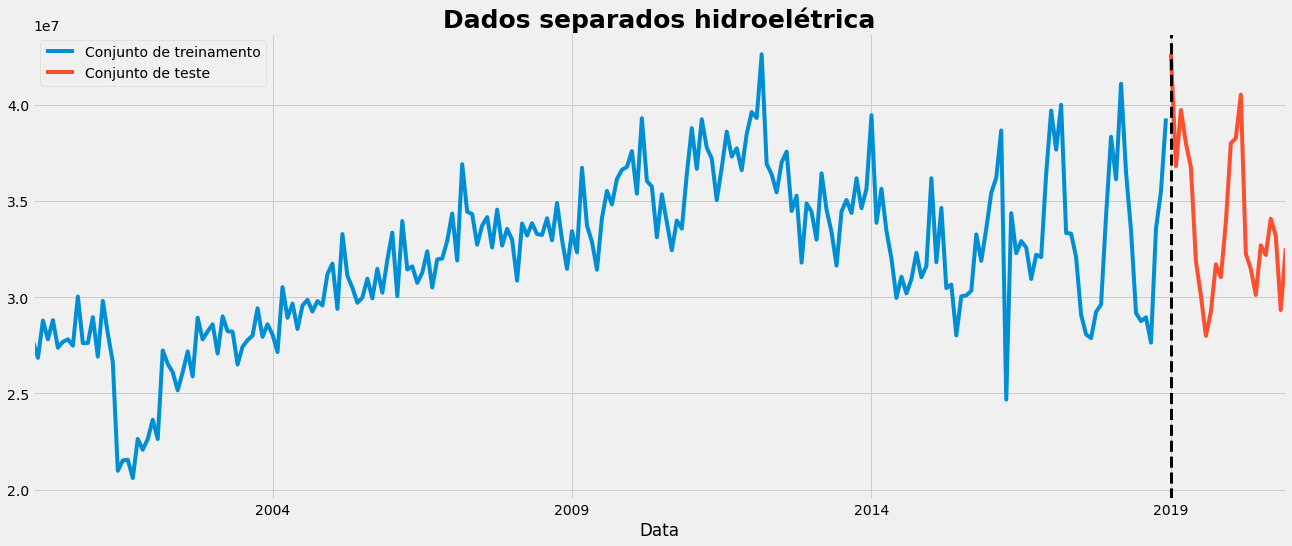

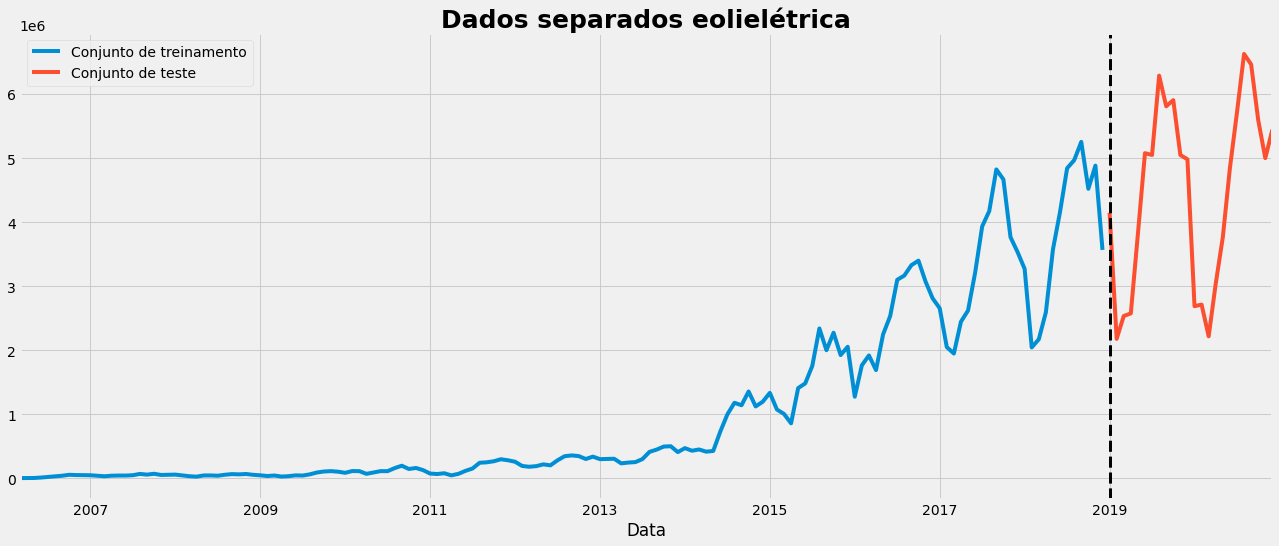

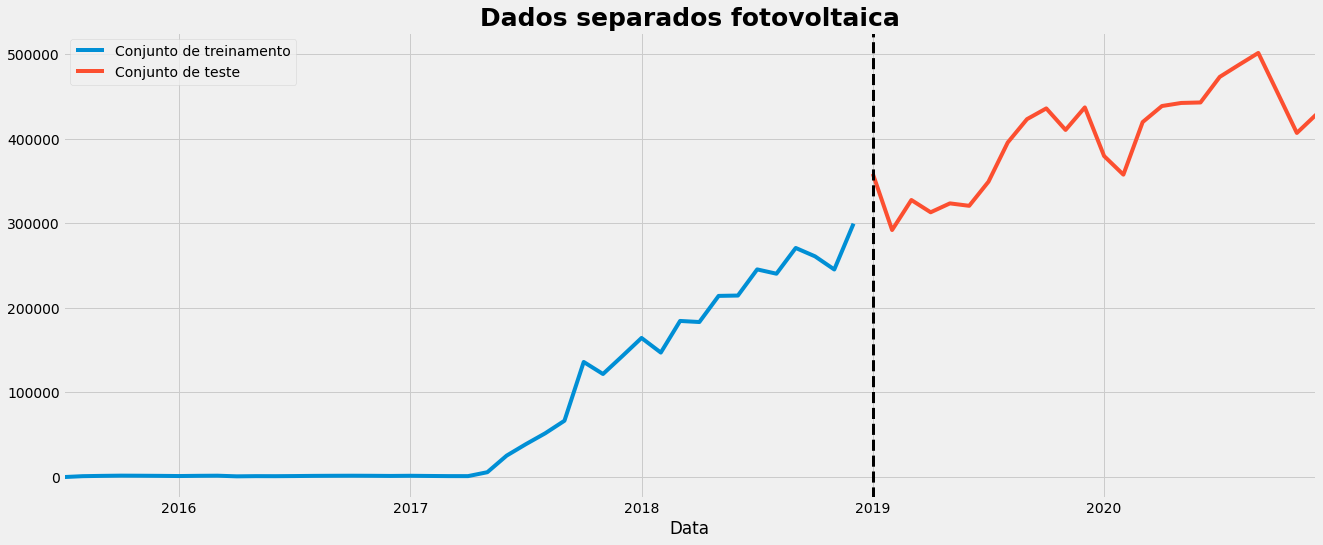

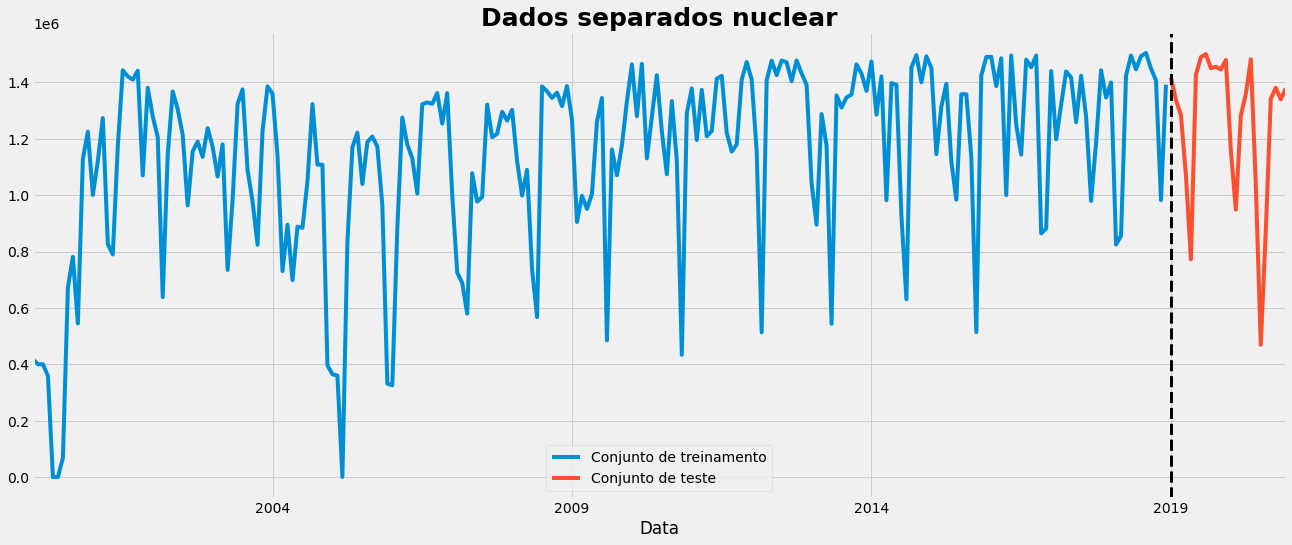

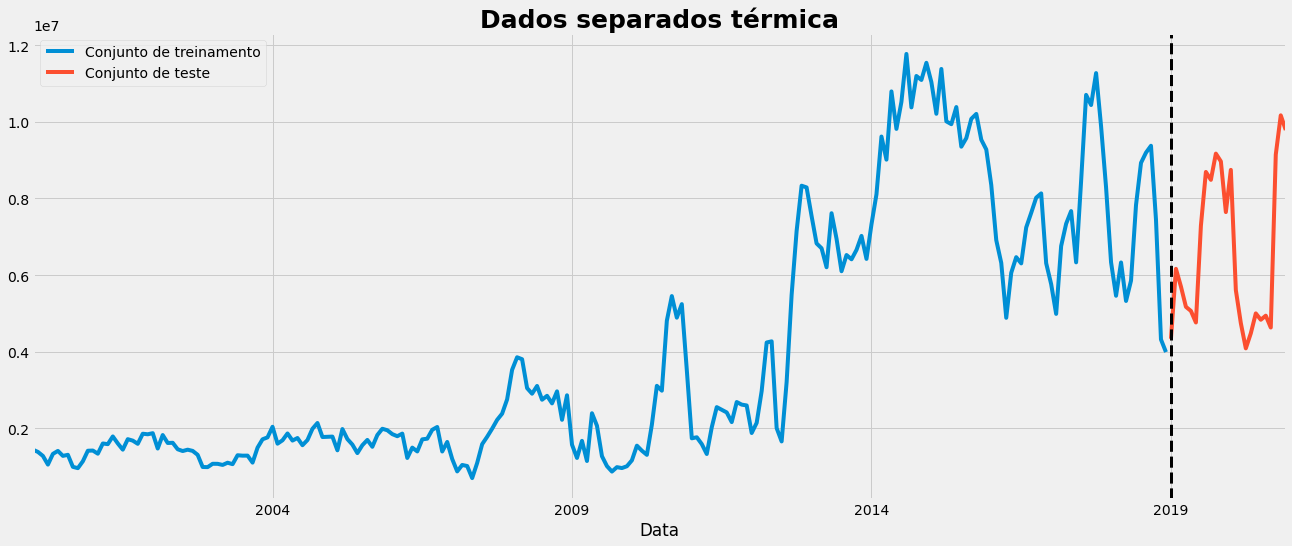

In [38]:
# Criando um gráfico para para entender como os dados são distribuídos ao longo do tempo e 
# como foram divididos entre treinamento e teste

plt.figure(figsize=(20,8))

df_train_h['HIDROELÉTRICA'].plot(label='Conjunto de treinamento')
df_test_h['HIDROELÉTRICA'].plot(label='Conjunto de teste')
plt.axvline('2019-01-01', color='black', ls='--', lw=3)
plt.title('Dados separados hidroelétrica', weight='bold', fontsize=25)
plt.legend()
print('\n')

plt.figure(figsize=(20,8))

df_train_e['EOLIELÉTRICA'].plot(label='Conjunto de treinamento')
df_test_e['EOLIELÉTRICA'].plot(label='Conjunto de teste')
plt.axvline('2019-01-01', color='black', ls='--', lw=3)
plt.title('Dados separados eolielétrica', weight='bold', fontsize=25)
plt.legend()
print('\n')

plt.figure(figsize=(20,8))

df_train_f['FOTOVOLTAICA'].plot(label='Conjunto de treinamento')
df_test_f['FOTOVOLTAICA'].plot(label='Conjunto de teste')
plt.axvline('2019-01-01', color='black', ls='--', lw=3)
plt.title('Dados separados fotovoltaica', weight='bold', fontsize=25)
plt.legend()
print('\n')

plt.figure(figsize=(20,8))

df_train_n['NUCLEAR'].plot(label='Conjunto de treinamento')
df_test_n['NUCLEAR'].plot(label='Conjunto de teste')
plt.axvline('2019-01-01', color='black', ls='--', lw=3)
plt.title('Dados separados nuclear', weight='bold', fontsize=25)
plt.legend()
print('\n')

plt.figure(figsize=(20,8))

df_train_t['TÉRMICA'].plot(label='Conjunto de treinamento')
df_test_t['TÉRMICA'].plot(label='Conjunto de teste')
plt.axvline('2019-01-01', color='black', ls='--', lw=3)
plt.title('Dados separados térmica', weight='bold', fontsize=25)
plt.legend()
print('\n')


In [39]:
# Criando uma função que adiciona características de Data ao dataframe, que serão usadas pelo algoritmo para fazer previsão
# A função separa as bases em duas, uma contendo as características criadas e outra com o valor alvo a ser previsto

#HIDROELÉTRICA
def date_transform_h(data):
    df = data.copy()
    
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.weekofyear
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop('HIDROELÉTRICA', axis=1)
    y = df['HIDROELÉTRICA']
    
    return X, y

X_train_h, y_train_h = date_transform_h(df_train_h)
X_test_h, y_test_h = date_transform_h(df_test_h)

#EOLIELÉTRICA
def date_transform_e(data):
    df = data.copy()
    
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.weekofyear
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop('EOLIELÉTRICA', axis=1)
    y = df['EOLIELÉTRICA']
    
    return X, y

X_train_e, y_train_e = date_transform_e(df_train_e)
X_test_e, y_test_e = date_transform_e(df_test_e)

#FOTOVOLTAICA
def date_transform_f(data):
    df = data.copy()
    
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.weekofyear
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop('FOTOVOLTAICA', axis=1)
    y = df['FOTOVOLTAICA']
    
    return X, y

X_train_f, y_train_f = date_transform_f(df_train_f)
X_test_f, y_test_f = date_transform_f(df_test_f)

#NUCLEAR
def date_transform_n(data):
    df = data.copy()
    
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.weekofyear
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop('NUCLEAR', axis=1)
    y = df['NUCLEAR']
    
    return X, y

X_train_n, y_train_n = date_transform_n(df_train_n)
X_test_n, y_test_n = date_transform_n(df_test_n)

#TÉRMICA
def date_transform_t(data):
    df = data.copy()
    
    df['Hour'] = df.index.hour
    df['Dayofweek'] = df.index.dayofweek
    df['Dayofmonth'] = df.index.day
    df['Dayofyear'] = df.index.dayofyear
    df['weekofyear'] = df.index.weekofyear
    df['Month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['Year'] = df.index.year
    
    X = df.drop('TÉRMICA', axis=1)
    y = df['TÉRMICA']
    
    return X, y

X_train_t, y_train_t = date_transform_t(df_train_t)
X_test_t, y_test_t = date_transform_t(df_test_t)



C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  if sys.path[0] == '':
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int

In [40]:
# Concatenar os conjuntos de treinamento e teste para formar correlacao_h

#HIDROELÉTRICA

correlacao_h = pd.concat([X_train_h, y_train_h], axis=1)

# Adicionar X_test_h e y_test_h abaixo de correlacao_h usando append
correlacao_h = correlacao_h.append(pd.concat([X_test_h, y_test_h], axis=1), ignore_index=True)

# Calcular a correlação

correlacao_h = correlacao_h.corr()

# Selecionar as correlações relevantes
correlacao_h = correlacao_h['HIDROELÉTRICA'].drop('HIDROELÉTRICA')

# Exibir as correlações relevantes
print("Correlação com a variável alvo para todas as variáveis em geração HIDROELÉTRICA:")
print(correlacao_h)

print('\n')

#EOLIELÉTRICA

correlacao_e = pd.concat([X_train_e, y_train_e], axis=1)

# Adicionar X_test_h e y_test_h abaixo de correlacao_h usando append
correlacao_e = correlacao_e.append(pd.concat([X_test_e, y_test_e], axis=1), ignore_index=True)

# Calcular a correlação

correlacao_e = correlacao_e.corr()

# Selecionar as correlações relevantes
correlacao_e = correlacao_e['EOLIELÉTRICA'].drop('EOLIELÉTRICA')

# Exibir as correlações relevantes
print("Correlação com a variável alvo para todas as variáveis em geração EOLIELÉTRICA:")
print(correlacao_e)

print('\n')

#FOTOVOLTAICA

correlacao_f = pd.concat([X_train_f, y_train_f], axis=1)

# Adicionar X_test_h e y_test_h abaixo de correlacao_h usando append
correlacao_f = correlacao_f.append(pd.concat([X_test_f, y_test_f], axis=1), ignore_index=True)

# Calcular a correlação

correlacao_f = correlacao_f.corr()

# Selecionar as correlações relevantes
correlacao_f = correlacao_f['FOTOVOLTAICA'].drop('FOTOVOLTAICA')

# Exibir as correlações relevantes
print("Correlação com a variável alvo para todas as variáveis em geração FOTOVOLTAICA:")
print(correlacao_f)

print('\n')

#NUCLEAR

correlacao_n = pd.concat([X_train_n, y_train_n], axis=1)

# Adicionar X_test_h e y_test_h abaixo de correlacao_h usando append
correlacao_n = correlacao_n.append(pd.concat([X_test_n, y_test_n], axis=1), ignore_index=True)

# Calcular a correlação

correlacao_n = correlacao_n.corr()

# Selecionar as correlações relevantes
correlacao_n = correlacao_n['NUCLEAR'].drop('NUCLEAR')

# Exibir as correlações relevantes
print("Correlação com a variável alvo para todas as variáveis em geração NUCLEAR:")
print(correlacao_n)

print('\n')

#TÉRMICA

correlacao_t = pd.concat([X_train_t, y_train_t], axis=1)

# Adicionar X_test_h e y_test_h abaixo de correlacao_h usando append
correlacao_t = correlacao_t.append(pd.concat([X_test_t, y_test_t], axis=1), ignore_index=True)

# Calcular a correlação

correlacao_t = correlacao_t.corr()

# Selecionar as correlações relevantes
correlacao_t = correlacao_t['TÉRMICA'].drop('TÉRMICA')

# Exibir as correlações relevantes
print("Correlação com a variável alvo para todas as variáveis em geração TÉRMICA:")
print(correlacao_t)

Correlação com a variável alvo para todas as variáveis em geração HIDROELÉTRICA:
Hour               NaN
Dayofweek    -0.026705
Dayofmonth         NaN
Dayofyear    -0.177421
weekofyear   -0.090695
Month        -0.177274
Quarter      -0.178046
Year          0.545219
Name: HIDROELÉTRICA, dtype: float64


Correlação com a variável alvo para todas as variáveis em geração EOLIELÉTRICA:
Hour               NaN
Dayofweek     0.011790
Dayofmonth         NaN
Dayofyear     0.185781
weekofyear    0.152846
Month         0.185204
Quarter       0.187399
Year          0.850332
Name: EOLIELÉTRICA, dtype: float64


Correlação com a variável alvo para todas as variáveis em geração FOTOVOLTAICA:
Hour               NaN
Dayofweek     0.036703
Dayofmonth         NaN
Dayofyear     0.071064
weekofyear   -0.035000
Month         0.070745
Quarter       0.065840
Year          0.942601
Name: FOTOVOLTAICA, dtype: float64


Correlação com a variável alvo para todas as variáveis em geração NUCLEAR:
Hour               N

In [41]:
# Utilizando o algoritmo XGBoost nas bases criadas na celula anterior.

#definindo parametros para o algoritmo 
xgb_model_h = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)

# treinando o modelo com as bases criadas, e definindo o erro médio absoluto como métrica de avaliação
xgb_model_h.fit(X_train_h, y_train_h, eval_metric='mae', eval_set=[(X_train_h, y_train_h), (X_test_h, y_test_h)])

# utilizando o modelo treinado para fazer as previsões 
xgb_pred_h = xgb_model_h.predict(X_test_h)

print('\n') 
xgb_model_e = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)
xgb_model_e.fit(X_train_e, y_train_e, eval_metric='mae', eval_set=[(X_train_e, y_train_e), (X_test_e, y_test_e)])
xgb_pred_e = xgb_model_e.predict(X_test_e)

print('\n') 
xgb_model_f = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)
xgb_model_f.fit(X_train_f, y_train_f, eval_metric='mae', eval_set=[(X_train_f, y_train_f), (X_test_f, y_test_f)])
xgb_pred_f = xgb_model_f.predict(X_test_f)

print('\n') 
xgb_model_n = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)
xgb_model_n.fit(X_train_n, y_train_n, eval_metric='mae', eval_set=[(X_train_n, y_train_n), (X_test_n, y_test_n)])
xgb_pred_n = xgb_model_n.predict(X_test_n)

print('\n') 
xgb_model_t = XGBRegressor(n_estimators=1000, learning_rate=0.05, early_stopping_rounds=10)
xgb_model_t.fit(X_train_t, y_train_t, eval_metric='mae', eval_set=[(X_train_t, y_train_t), (X_test_t, y_test_t)])
xgb_pred_t = xgb_model_t.predict(X_test_t)


[19:47:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mae:30449304.00000	validation_1-mae:32255914.00000
[1]	validation_0-mae:28939412.00000	validation_1-mae:30661088.00000
[2]	validation_0-mae:27504396.00000	validation_1-mae:29145528.00000
[3]	validation_0-mae:26140692.00000	validation_1-mae:27694838.00000
[4]	validation_0-mae:24844450.00000	validation_1-mae:26325734.00000
[5]	validation_0-mae:23612630.00000	validation_1-mae:25015130.00000
[6]	validation_0-mae:22441582.00000	validation_1-mae:23786810.00000
[7]	validation_0-mae:21328896.00000	validation_1-mae:22602350.00000
[8]	validation_0-mae:20271104.00000	validation_

[116]	validation_0-mae:413007.09375	validation_1-mae:2656577.25000
[117]	validation_0-mae:407562.65625	validation_1-mae:2659850.50000
[118]	validation_0-mae:402030.34375	validation_1-mae:2663342.25000
[119]	validation_0-mae:397088.62500	validation_1-mae:2666882.25000
[120]	validation_0-mae:390860.68750	validation_1-mae:2664534.75000
[121]	validation_0-mae:386416.68750	validation_1-mae:2667751.75000
[122]	validation_0-mae:382167.59375	validation_1-mae:2671019.75000
[123]	validation_0-mae:378162.25000	validation_1-mae:2674175.50000
[124]	validation_0-mae:372404.62500	validation_1-mae:2675961.25000
[125]	validation_0-mae:368042.62500	validation_1-mae:2677860.25000
[126]	validation_0-mae:364337.62500	validation_1-mae:2679717.25000
[127]	validation_0-mae:360828.12500	validation_1-mae:2681533.25000
[128]	validation_0-mae:355338.25000	validation_1-mae:2682163.00000
[129]	validation_0-mae:351654.25000	validation_1-mae:2683926.00000
[130]	validation_0-mae:348617.59375	validation_1-mae:2685649.7

[238]	validation_0-mae:134870.39062	validation_1-mae:2737493.00000
[239]	validation_0-mae:134199.62500	validation_1-mae:2738046.50000
[240]	validation_0-mae:133485.43750	validation_1-mae:2737975.50000
[241]	validation_0-mae:132025.71875	validation_1-mae:2737678.00000
[242]	validation_0-mae:131148.56250	validation_1-mae:2738316.75000
[243]	validation_0-mae:130386.44531	validation_1-mae:2738931.75000
[244]	validation_0-mae:129149.06250	validation_1-mae:2738638.75000
[245]	validation_0-mae:128435.47656	validation_1-mae:2738018.25000
[246]	validation_0-mae:127173.52344	validation_1-mae:2738665.75000
[247]	validation_0-mae:125994.82812	validation_1-mae:2739109.75000
[248]	validation_0-mae:125350.42188	validation_1-mae:2739719.00000
[249]	validation_0-mae:124489.29688	validation_1-mae:2740701.25000
[250]	validation_0-mae:123637.35938	validation_1-mae:2740827.75000
[251]	validation_0-mae:122806.29688	validation_1-mae:2741778.00000
[252]	validation_0-mae:121730.28906	validation_1-mae:2742375.2

[362]	validation_0-mae:55173.12109	validation_1-mae:2760696.25000
[363]	validation_0-mae:54814.26172	validation_1-mae:2761050.75000
[364]	validation_0-mae:54558.08594	validation_1-mae:2761311.25000
[365]	validation_0-mae:54246.76172	validation_1-mae:2761524.75000
[366]	validation_0-mae:53762.66797	validation_1-mae:2761905.00000
[367]	validation_0-mae:53451.21094	validation_1-mae:2761986.75000
[368]	validation_0-mae:53171.64062	validation_1-mae:2762186.25000
[369]	validation_0-mae:52961.57031	validation_1-mae:2762521.00000
[370]	validation_0-mae:52437.08594	validation_1-mae:2762514.75000
[371]	validation_0-mae:52149.57812	validation_1-mae:2762683.75000
[372]	validation_0-mae:51815.20312	validation_1-mae:2763056.25000
[373]	validation_0-mae:51557.67578	validation_1-mae:2763355.25000
[374]	validation_0-mae:51249.70312	validation_1-mae:2763474.75000
[375]	validation_0-mae:50631.14062	validation_1-mae:2763413.25000
[376]	validation_0-mae:50277.00781	validation_1-mae:2763482.00000
[377]	vali

[487]	validation_0-mae:22449.27148	validation_1-mae:2770643.75000
[488]	validation_0-mae:22396.42188	validation_1-mae:2770623.75000
[489]	validation_0-mae:22305.76367	validation_1-mae:2770489.00000
[490]	validation_0-mae:22232.71875	validation_1-mae:2770520.75000
[491]	validation_0-mae:22185.14062	validation_1-mae:2770459.00000
[492]	validation_0-mae:22029.29883	validation_1-mae:2770410.00000
[493]	validation_0-mae:21952.19336	validation_1-mae:2770358.00000
[494]	validation_0-mae:21797.00781	validation_1-mae:2770311.75000
[495]	validation_0-mae:21643.22852	validation_1-mae:2770453.00000
[496]	validation_0-mae:21505.86914	validation_1-mae:2770541.75000
[497]	validation_0-mae:21429.35938	validation_1-mae:2770441.25000
[498]	validation_0-mae:21305.06055	validation_1-mae:2770575.25000
[499]	validation_0-mae:21232.60547	validation_1-mae:2770481.75000
[500]	validation_0-mae:21082.15820	validation_1-mae:2770450.50000
[501]	validation_0-mae:20985.73633	validation_1-mae:2770519.50000
[502]	vali

[612]	validation_0-mae:9318.92969	validation_1-mae:2772090.25000
[613]	validation_0-mae:9269.20215	validation_1-mae:2772102.25000
[614]	validation_0-mae:9213.42090	validation_1-mae:2772086.00000
[615]	validation_0-mae:9143.43848	validation_1-mae:2772117.75000
[616]	validation_0-mae:9104.60547	validation_1-mae:2772165.50000
[617]	validation_0-mae:9056.04394	validation_1-mae:2772185.75000
[618]	validation_0-mae:9011.15820	validation_1-mae:2772192.00000
[619]	validation_0-mae:8961.25391	validation_1-mae:2772209.50000
[620]	validation_0-mae:8897.95606	validation_1-mae:2772157.00000
[621]	validation_0-mae:8807.11426	validation_1-mae:2772161.00000
[622]	validation_0-mae:8756.27148	validation_1-mae:2772142.25000
[623]	validation_0-mae:8718.22852	validation_1-mae:2772120.25000
[624]	validation_0-mae:8687.50000	validation_1-mae:2772105.25000
[625]	validation_0-mae:8655.59668	validation_1-mae:2772091.00000
[626]	validation_0-mae:8584.71094	validation_1-mae:2772116.00000
[627]	validation_0-mae:85

[738]	validation_0-mae:4295.50000	validation_1-mae:2771802.50000
[739]	validation_0-mae:4273.17529	validation_1-mae:2771793.25000
[740]	validation_0-mae:4251.61426	validation_1-mae:2771791.75000
[741]	validation_0-mae:4232.32471	validation_1-mae:2771790.25000
[742]	validation_0-mae:4208.05273	validation_1-mae:2771787.25000
[743]	validation_0-mae:4188.15772	validation_1-mae:2771786.00000
[744]	validation_0-mae:4167.28955	validation_1-mae:2771766.00000
[745]	validation_0-mae:4150.67529	validation_1-mae:2771763.75000
[746]	validation_0-mae:4119.57910	validation_1-mae:2771758.00000
[747]	validation_0-mae:4106.96484	validation_1-mae:2771762.25000
[748]	validation_0-mae:4093.47363	validation_1-mae:2771764.25000
[749]	validation_0-mae:4074.42114	validation_1-mae:2771745.25000
[750]	validation_0-mae:4039.33325	validation_1-mae:2771781.75000
[751]	validation_0-mae:4006.15796	validation_1-mae:2771812.75000
[752]	validation_0-mae:3969.64917	validation_1-mae:2771824.25000
[753]	validation_0-mae:39

[865]	validation_0-mae:2078.38599	validation_1-mae:2771697.25000
[866]	validation_0-mae:2068.89478	validation_1-mae:2771693.75000
[867]	validation_0-mae:2061.72803	validation_1-mae:2771688.75000
[868]	validation_0-mae:2054.69287	validation_1-mae:2771687.25000
[869]	validation_0-mae:2038.03503	validation_1-mae:2771695.75000
[870]	validation_0-mae:2021.52637	validation_1-mae:2771703.25000
[871]	validation_0-mae:2011.29822	validation_1-mae:2771701.00000
[872]	validation_0-mae:2005.05261	validation_1-mae:2771705.75000
[873]	validation_0-mae:1992.51758	validation_1-mae:2771702.75000
[874]	validation_0-mae:1983.15784	validation_1-mae:2771703.00000
[875]	validation_0-mae:1978.72803	validation_1-mae:2771708.25000
[876]	validation_0-mae:1975.50879	validation_1-mae:2771707.25000
[877]	validation_0-mae:1970.61401	validation_1-mae:2771710.75000
[878]	validation_0-mae:1952.58777	validation_1-mae:2771712.75000
[879]	validation_0-mae:1944.81580	validation_1-mae:2771708.75000
[880]	validation_0-mae:19

[992]	validation_0-mae:938.20178	validation_1-mae:2771806.00000
[993]	validation_0-mae:933.24560	validation_1-mae:2771808.25000
[994]	validation_0-mae:927.85089	validation_1-mae:2771813.00000
[995]	validation_0-mae:922.48248	validation_1-mae:2771814.25000
[996]	validation_0-mae:915.10529	validation_1-mae:2771805.25000
[997]	validation_0-mae:909.19299	validation_1-mae:2771808.25000
[998]	validation_0-mae:897.12280	validation_1-mae:2771806.75000
[999]	validation_0-mae:886.73682	validation_1-mae:2771803.00000


[19:48:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-mae:978685.81250	validation_1-mae:4312736.00000
[1]	validati

[112]	validation_0-mae:15135.67578	validation_1-mae:782228.00000
[113]	validation_0-mae:14778.44141	validation_1-mae:780716.31250
[114]	validation_0-mae:14429.10742	validation_1-mae:779253.25000
[115]	validation_0-mae:14095.40723	validation_1-mae:777386.68750
[116]	validation_0-mae:13770.69824	validation_1-mae:775579.68750
[117]	validation_0-mae:13441.87695	validation_1-mae:774153.31250
[118]	validation_0-mae:13147.60840	validation_1-mae:772770.68750
[119]	validation_0-mae:12865.99414	validation_1-mae:771430.00000
[120]	validation_0-mae:12624.11328	validation_1-mae:770120.25000
[121]	validation_0-mae:12367.30664	validation_1-mae:768850.25000
[122]	validation_0-mae:12117.29297	validation_1-mae:767627.50000
[123]	validation_0-mae:11887.87695	validation_1-mae:766432.68750
[124]	validation_0-mae:11662.31641	validation_1-mae:765310.00000
[125]	validation_0-mae:11445.18164	validation_1-mae:764219.75000
[126]	validation_0-mae:11239.60840	validation_1-mae:763161.06250
[127]	validation_0-mae:11

[239]	validation_0-mae:3191.61353	validation_1-mae:729505.93750
[240]	validation_0-mae:3175.96680	validation_1-mae:729460.18750
[241]	validation_0-mae:3158.99927	validation_1-mae:729415.81250
[242]	validation_0-mae:3144.37939	validation_1-mae:729372.68750
[243]	validation_0-mae:3126.93628	validation_1-mae:729330.56250
[244]	validation_0-mae:3100.64600	validation_1-mae:729289.31250
[245]	validation_0-mae:3087.13428	validation_1-mae:729249.31250
[246]	validation_0-mae:3061.75513	validation_1-mae:729210.31250
[247]	validation_0-mae:3040.69019	validation_1-mae:729172.31250
[248]	validation_0-mae:3021.52710	validation_1-mae:729135.25000
[249]	validation_0-mae:3003.88965	validation_1-mae:729098.81250
[250]	validation_0-mae:2985.03442	validation_1-mae:729063.68750
[251]	validation_0-mae:2972.74561	validation_1-mae:729029.31250
[252]	validation_0-mae:2956.52026	validation_1-mae:728995.81250
[253]	validation_0-mae:2934.82666	validation_1-mae:728963.25000
[254]	validation_0-mae:2917.08203	valida

[367]	validation_0-mae:995.49023	validation_1-mae:727772.68750
[368]	validation_0-mae:985.16821	validation_1-mae:727776.18750
[369]	validation_0-mae:974.74951	validation_1-mae:727787.00000
[370]	validation_0-mae:963.96875	validation_1-mae:727775.18750
[371]	validation_0-mae:954.26361	validation_1-mae:727784.68750
[372]	validation_0-mae:945.98224	validation_1-mae:727781.50000
[373]	validation_0-mae:940.24176	validation_1-mae:727781.68750
[374]	validation_0-mae:926.72730	validation_1-mae:727788.50000
[375]	validation_0-mae:921.24432	validation_1-mae:727787.81250
[376]	validation_0-mae:910.29993	validation_1-mae:727793.25000
[377]	validation_0-mae:899.89587	validation_1-mae:727794.00000
[378]	validation_0-mae:891.09723	validation_1-mae:727803.81250
[379]	validation_0-mae:879.47443	validation_1-mae:727800.31250
[380]	validation_0-mae:868.44482	validation_1-mae:727796.06250
[381]	validation_0-mae:863.43689	validation_1-mae:727796.25000
[382]	validation_0-mae:853.35785	validation_1-mae:72780

[498]	validation_0-mae:288.09366	validation_1-mae:727875.68750
[499]	validation_0-mae:285.60345	validation_1-mae:727876.56250
[500]	validation_0-mae:283.19943	validation_1-mae:727880.56250
[501]	validation_0-mae:280.79926	validation_1-mae:727881.50000
[502]	validation_0-mae:278.70084	validation_1-mae:727881.00000
[503]	validation_0-mae:276.74264	validation_1-mae:727881.68750
[504]	validation_0-mae:274.87582	validation_1-mae:727881.50000
[505]	validation_0-mae:272.06229	validation_1-mae:727879.68750
[506]	validation_0-mae:269.30072	validation_1-mae:727880.68750
[507]	validation_0-mae:266.30118	validation_1-mae:727882.00000
[508]	validation_0-mae:264.10645	validation_1-mae:727883.81250
[509]	validation_0-mae:262.34146	validation_1-mae:727885.18750
[510]	validation_0-mae:259.60077	validation_1-mae:727886.50000
[511]	validation_0-mae:257.01691	validation_1-mae:727884.18750
[512]	validation_0-mae:254.83041	validation_1-mae:727882.81250
[513]	validation_0-mae:252.85229	validation_1-mae:72788

[629]	validation_0-mae:100.14516	validation_1-mae:727875.50000
[630]	validation_0-mae:99.62611	validation_1-mae:727875.18750
[631]	validation_0-mae:98.85692	validation_1-mae:727874.56250
[632]	validation_0-mae:98.36369	validation_1-mae:727874.31250
[633]	validation_0-mae:97.47895	validation_1-mae:727874.75000
[634]	validation_0-mae:96.62920	validation_1-mae:727874.18750
[635]	validation_0-mae:96.34202	validation_1-mae:727874.25000
[636]	validation_0-mae:95.85782	validation_1-mae:727874.18750
[637]	validation_0-mae:95.38866	validation_1-mae:727874.06250
[638]	validation_0-mae:94.45519	validation_1-mae:727874.06250
[639]	validation_0-mae:93.60068	validation_1-mae:727874.43750
[640]	validation_0-mae:93.06324	validation_1-mae:727875.81250
[641]	validation_0-mae:92.60004	validation_1-mae:727876.81250
[642]	validation_0-mae:92.04813	validation_1-mae:727877.18750
[643]	validation_0-mae:91.01912	validation_1-mae:727877.06250
[644]	validation_0-mae:90.14642	validation_1-mae:727877.00000
[645]	v

[762]	validation_0-mae:30.73346	validation_1-mae:727877.00000
[763]	validation_0-mae:30.61264	validation_1-mae:727876.81250
[764]	validation_0-mae:30.47068	validation_1-mae:727876.93750
[765]	validation_0-mae:30.21195	validation_1-mae:727877.18750
[766]	validation_0-mae:30.04653	validation_1-mae:727877.06250
[767]	validation_0-mae:29.93910	validation_1-mae:727877.18750
[768]	validation_0-mae:29.72730	validation_1-mae:727877.25000
[769]	validation_0-mae:29.48341	validation_1-mae:727877.18750
[770]	validation_0-mae:29.37822	validation_1-mae:727877.25000
[771]	validation_0-mae:29.15389	validation_1-mae:727877.25000
[772]	validation_0-mae:28.96145	validation_1-mae:727877.25000
[773]	validation_0-mae:28.76506	validation_1-mae:727877.31250
[774]	validation_0-mae:28.54659	validation_1-mae:727877.31250
[775]	validation_0-mae:28.34591	validation_1-mae:727877.31250
[776]	validation_0-mae:28.09502	validation_1-mae:727877.31250
[777]	validation_0-mae:27.84220	validation_1-mae:727877.31250
[778]	va

[895]	validation_0-mae:10.88961	validation_1-mae:727880.18750
[896]	validation_0-mae:10.73567	validation_1-mae:727880.18750
[897]	validation_0-mae:10.59721	validation_1-mae:727880.06250
[898]	validation_0-mae:10.50591	validation_1-mae:727880.18750
[899]	validation_0-mae:10.37591	validation_1-mae:727880.06250
[900]	validation_0-mae:10.29161	validation_1-mae:727880.06250
[901]	validation_0-mae:10.17825	validation_1-mae:727880.25000
[902]	validation_0-mae:10.06356	validation_1-mae:727880.18750
[903]	validation_0-mae:9.95838	validation_1-mae:727880.18750
[904]	validation_0-mae:9.88009	validation_1-mae:727880.18750
[905]	validation_0-mae:9.78298	validation_1-mae:727880.31250
[906]	validation_0-mae:9.71144	validation_1-mae:727880.43750
[907]	validation_0-mae:9.62319	validation_1-mae:727880.31250
[908]	validation_0-mae:9.52711	validation_1-mae:727880.50000
[909]	validation_0-mae:9.42235	validation_1-mae:727880.50000
[910]	validation_0-mae:9.31078	validation_1-mae:727880.50000
[911]	validation

[21]	validation_0-mae:29827.15234	validation_1-mae:260044.45312
[22]	validation_0-mae:28570.75000	validation_1-mae:256531.68750
[23]	validation_0-mae:27379.32422	validation_1-mae:253169.45312
[24]	validation_0-mae:26244.59766	validation_1-mae:249951.37500
[25]	validation_0-mae:25123.34180	validation_1-mae:246767.54688
[26]	validation_0-mae:24078.28906	validation_1-mae:243823.79688
[27]	validation_0-mae:23064.67578	validation_1-mae:241006.20312
[28]	validation_0-mae:22109.70312	validation_1-mae:238309.37500
[29]	validation_0-mae:21177.88672	validation_1-mae:235689.93750
[30]	validation_0-mae:20297.43359	validation_1-mae:233220.95312
[31]	validation_0-mae:19457.30273	validation_1-mae:230857.76562
[32]	validation_0-mae:18647.45312	validation_1-mae:228595.87500
[33]	validation_0-mae:17850.70508	validation_1-mae:226354.79688
[34]	validation_0-mae:17099.79883	validation_1-mae:224285.87500
[35]	validation_0-mae:16388.30664	validation_1-mae:222305.62500
[36]	validation_0-mae:15702.28906	valida

[151]	validation_0-mae:337.06879	validation_1-mae:180247.98438
[152]	validation_0-mae:327.63995	validation_1-mae:180233.04688
[153]	validation_0-mae:317.88162	validation_1-mae:180218.29688
[154]	validation_0-mae:308.35129	validation_1-mae:180200.70312
[155]	validation_0-mae:299.73129	validation_1-mae:180186.20312
[156]	validation_0-mae:291.37656	validation_1-mae:180172.20312
[157]	validation_0-mae:283.32404	validation_1-mae:180159.57812
[158]	validation_0-mae:275.23856	validation_1-mae:180146.89062
[159]	validation_0-mae:267.64600	validation_1-mae:180135.04688
[160]	validation_0-mae:260.89877	validation_1-mae:180123.98438
[161]	validation_0-mae:253.71573	validation_1-mae:180112.85938
[162]	validation_0-mae:247.08115	validation_1-mae:180101.70312
[163]	validation_0-mae:240.50626	validation_1-mae:180091.35938
[164]	validation_0-mae:234.47257	validation_1-mae:180081.57812
[165]	validation_0-mae:228.22798	validation_1-mae:180071.82812
[166]	validation_0-mae:222.18401	validation_1-mae:18006

[283]	validation_0-mae:14.85781	validation_1-mae:179733.64062
[284]	validation_0-mae:14.55418	validation_1-mae:179733.35938
[285]	validation_0-mae:14.24126	validation_1-mae:179733.12500
[286]	validation_0-mae:13.95727	validation_1-mae:179732.82812
[287]	validation_0-mae:13.65994	validation_1-mae:179732.57812
[288]	validation_0-mae:13.38861	validation_1-mae:179732.31250
[289]	validation_0-mae:13.10628	validation_1-mae:179732.10938
[290]	validation_0-mae:12.85037	validation_1-mae:179731.82812
[291]	validation_0-mae:12.58245	validation_1-mae:179731.62500
[292]	validation_0-mae:12.31473	validation_1-mae:179731.42188
[293]	validation_0-mae:12.06078	validation_1-mae:179731.23438
[294]	validation_0-mae:11.80557	validation_1-mae:179731.04688
[295]	validation_0-mae:11.56313	validation_1-mae:179730.85938
[296]	validation_0-mae:11.34485	validation_1-mae:179730.62500
[297]	validation_0-mae:11.11545	validation_1-mae:179730.42188
[298]	validation_0-mae:10.89434	validation_1-mae:179730.25000
[299]	va

[417]	validation_0-mae:1.01926	validation_1-mae:179722.42188
[418]	validation_0-mae:1.00363	validation_1-mae:179722.39062
[419]	validation_0-mae:0.98237	validation_1-mae:179722.39062
[420]	validation_0-mae:0.96976	validation_1-mae:179722.37500
[421]	validation_0-mae:0.95728	validation_1-mae:179722.37500
[422]	validation_0-mae:0.93669	validation_1-mae:179722.37500
[423]	validation_0-mae:0.92242	validation_1-mae:179722.35938
[424]	validation_0-mae:0.90200	validation_1-mae:179722.32812
[425]	validation_0-mae:0.88767	validation_1-mae:179722.32812
[426]	validation_0-mae:0.86906	validation_1-mae:179722.32812
[427]	validation_0-mae:0.85557	validation_1-mae:179722.32812
[428]	validation_0-mae:0.83871	validation_1-mae:179722.32812
[429]	validation_0-mae:0.82684	validation_1-mae:179722.32812
[430]	validation_0-mae:0.80865	validation_1-mae:179722.32812
[431]	validation_0-mae:0.79637	validation_1-mae:179722.32812
[432]	validation_0-mae:0.77872	validation_1-mae:179722.29688
[433]	validation_0-mae:0

[551]	validation_0-mae:0.13379	validation_1-mae:179722.04688
[552]	validation_0-mae:0.13276	validation_1-mae:179722.04688
[553]	validation_0-mae:0.13205	validation_1-mae:179722.04688
[554]	validation_0-mae:0.13197	validation_1-mae:179722.04688
[555]	validation_0-mae:0.13189	validation_1-mae:179722.04688
[556]	validation_0-mae:0.13181	validation_1-mae:179722.04688
[557]	validation_0-mae:0.13173	validation_1-mae:179722.04688
[558]	validation_0-mae:0.13165	validation_1-mae:179722.04688
[559]	validation_0-mae:0.13157	validation_1-mae:179722.04688
[560]	validation_0-mae:0.13144	validation_1-mae:179722.04688
[561]	validation_0-mae:0.13136	validation_1-mae:179722.04688
[562]	validation_0-mae:0.13114	validation_1-mae:179722.04688
[563]	validation_0-mae:0.13106	validation_1-mae:179722.04688
[564]	validation_0-mae:0.13084	validation_1-mae:179722.04688
[565]	validation_0-mae:0.13077	validation_1-mae:179722.04688
[566]	validation_0-mae:0.13056	validation_1-mae:179722.04688
[567]	validation_0-mae:0

[686]	validation_0-mae:0.12505	validation_1-mae:179722.04688
[687]	validation_0-mae:0.12505	validation_1-mae:179722.04688
[688]	validation_0-mae:0.12516	validation_1-mae:179722.04688
[689]	validation_0-mae:0.12493	validation_1-mae:179722.04688
[690]	validation_0-mae:0.12492	validation_1-mae:179722.04688
[691]	validation_0-mae:0.12491	validation_1-mae:179722.04688
[692]	validation_0-mae:0.12408	validation_1-mae:179722.04688
[693]	validation_0-mae:0.12326	validation_1-mae:179722.04688
[694]	validation_0-mae:0.12247	validation_1-mae:179722.04688
[695]	validation_0-mae:0.12171	validation_1-mae:179722.04688
[696]	validation_0-mae:0.12095	validation_1-mae:179722.01562
[697]	validation_0-mae:0.12016	validation_1-mae:179722.01562
[698]	validation_0-mae:0.11938	validation_1-mae:179722.01562
[699]	validation_0-mae:0.11864	validation_1-mae:179722.01562
[700]	validation_0-mae:0.11836	validation_1-mae:179722.01562
[701]	validation_0-mae:0.11817	validation_1-mae:179722.01562
[702]	validation_0-mae:0

[821]	validation_0-mae:0.09360	validation_1-mae:179722.00000
[822]	validation_0-mae:0.09362	validation_1-mae:179722.00000
[823]	validation_0-mae:0.09363	validation_1-mae:179722.00000
[824]	validation_0-mae:0.09364	validation_1-mae:179722.00000
[825]	validation_0-mae:0.09363	validation_1-mae:179722.00000
[826]	validation_0-mae:0.09363	validation_1-mae:179722.00000
[827]	validation_0-mae:0.09363	validation_1-mae:179722.00000
[828]	validation_0-mae:0.09362	validation_1-mae:179722.00000
[829]	validation_0-mae:0.09355	validation_1-mae:179722.00000
[830]	validation_0-mae:0.09355	validation_1-mae:179722.00000
[831]	validation_0-mae:0.09357	validation_1-mae:179722.00000
[832]	validation_0-mae:0.09356	validation_1-mae:179722.00000
[833]	validation_0-mae:0.09356	validation_1-mae:179722.00000
[834]	validation_0-mae:0.09356	validation_1-mae:179722.00000
[835]	validation_0-mae:0.09355	validation_1-mae:179722.00000
[836]	validation_0-mae:0.09355	validation_1-mae:179722.00000
[837]	validation_0-mae:0

[955]	validation_0-mae:0.09302	validation_1-mae:179722.00000
[956]	validation_0-mae:0.09303	validation_1-mae:179722.00000
[957]	validation_0-mae:0.09303	validation_1-mae:179722.00000
[958]	validation_0-mae:0.09303	validation_1-mae:179722.00000
[959]	validation_0-mae:0.09304	validation_1-mae:179722.00000
[960]	validation_0-mae:0.09304	validation_1-mae:179722.00000
[961]	validation_0-mae:0.09304	validation_1-mae:179722.00000
[962]	validation_0-mae:0.09296	validation_1-mae:179722.00000
[963]	validation_0-mae:0.09296	validation_1-mae:179722.00000
[964]	validation_0-mae:0.09296	validation_1-mae:179722.00000
[965]	validation_0-mae:0.09297	validation_1-mae:179722.00000
[966]	validation_0-mae:0.09297	validation_1-mae:179722.00000
[967]	validation_0-mae:0.09297	validation_1-mae:179722.00000
[968]	validation_0-mae:0.09297	validation_1-mae:179722.00000
[969]	validation_0-mae:0.09297	validation_1-mae:179722.00000
[970]	validation_0-mae:0.09297	validation_1-mae:179722.00000
[971]	validation_0-mae:0

[78]	validation_0-mae:103526.20312	validation_1-mae:241422.54688
[79]	validation_0-mae:102570.71094	validation_1-mae:241525.70312
[80]	validation_0-mae:101236.91406	validation_1-mae:241558.07812
[81]	validation_0-mae:100002.36719	validation_1-mae:241243.67188
[82]	validation_0-mae:98868.84375	validation_1-mae:240683.43750
[83]	validation_0-mae:97396.17188	validation_1-mae:240518.14062
[84]	validation_0-mae:96358.91406	validation_1-mae:240327.79688
[85]	validation_0-mae:95505.28906	validation_1-mae:240255.75000
[86]	validation_0-mae:94070.74219	validation_1-mae:240089.32812
[87]	validation_0-mae:93088.00781	validation_1-mae:239584.57812
[88]	validation_0-mae:92294.42188	validation_1-mae:239676.17188
[89]	validation_0-mae:91217.94531	validation_1-mae:239680.45312
[90]	validation_0-mae:90328.73438	validation_1-mae:239331.14062
[91]	validation_0-mae:89513.00000	validation_1-mae:239427.20312
[92]	validation_0-mae:88659.07031	validation_1-mae:239427.67188
[93]	validation_0-mae:87939.40625	va

[204]	validation_0-mae:34409.26172	validation_1-mae:246683.79688
[205]	validation_0-mae:34055.78125	validation_1-mae:246854.39062
[206]	validation_0-mae:33748.57031	validation_1-mae:247018.42188
[207]	validation_0-mae:33309.97266	validation_1-mae:247091.70312
[208]	validation_0-mae:32973.23047	validation_1-mae:247226.14062
[209]	validation_0-mae:32644.36914	validation_1-mae:247325.82812
[210]	validation_0-mae:32262.58789	validation_1-mae:247528.01562
[211]	validation_0-mae:31917.74219	validation_1-mae:247653.32812
[212]	validation_0-mae:31625.71875	validation_1-mae:247855.37500
[213]	validation_0-mae:31344.81641	validation_1-mae:248036.20312
[214]	validation_0-mae:31063.56055	validation_1-mae:247963.37500
[215]	validation_0-mae:30802.81055	validation_1-mae:247965.67188
[216]	validation_0-mae:30561.59180	validation_1-mae:247969.70312
[217]	validation_0-mae:30335.41211	validation_1-mae:248011.25000
[218]	validation_0-mae:30106.43555	validation_1-mae:247968.75000
[219]	validation_0-mae:29

[330]	validation_0-mae:13470.12109	validation_1-mae:252810.56250
[331]	validation_0-mae:13398.15039	validation_1-mae:252820.50000
[332]	validation_0-mae:13267.28320	validation_1-mae:252894.06250
[333]	validation_0-mae:13168.68359	validation_1-mae:252996.92188
[334]	validation_0-mae:13105.23242	validation_1-mae:253096.82812
[335]	validation_0-mae:12995.42285	validation_1-mae:253183.89062
[336]	validation_0-mae:12918.00000	validation_1-mae:253187.81250
[337]	validation_0-mae:12801.77832	validation_1-mae:253243.14062
[338]	validation_0-mae:12685.14941	validation_1-mae:253297.04688
[339]	validation_0-mae:12596.79297	validation_1-mae:253322.17188
[340]	validation_0-mae:12539.12891	validation_1-mae:253344.31250
[341]	validation_0-mae:12473.04981	validation_1-mae:253372.98438
[342]	validation_0-mae:12406.68164	validation_1-mae:253439.26562
[343]	validation_0-mae:12342.07031	validation_1-mae:253568.81250
[344]	validation_0-mae:12290.45801	validation_1-mae:253640.92188
[345]	validation_0-mae:12

[458]	validation_0-mae:6465.69043	validation_1-mae:255612.67188
[459]	validation_0-mae:6424.20117	validation_1-mae:255625.70312
[460]	validation_0-mae:6368.23828	validation_1-mae:255620.42188
[461]	validation_0-mae:6311.96582	validation_1-mae:255615.17188
[462]	validation_0-mae:6268.53760	validation_1-mae:255607.17188
[463]	validation_0-mae:6204.72461	validation_1-mae:255565.17188
[464]	validation_0-mae:6168.16406	validation_1-mae:255568.92188
[465]	validation_0-mae:6130.33105	validation_1-mae:255572.48438
[466]	validation_0-mae:6080.32715	validation_1-mae:255520.54688
[467]	validation_0-mae:6046.59961	validation_1-mae:255524.00000
[468]	validation_0-mae:6014.12939	validation_1-mae:255537.01562
[469]	validation_0-mae:5995.91943	validation_1-mae:255533.54688
[470]	validation_0-mae:5984.39111	validation_1-mae:255550.87500
[471]	validation_0-mae:5950.75000	validation_1-mae:255554.29688
[472]	validation_0-mae:5936.78662	validation_1-mae:255569.25000
[473]	validation_0-mae:5891.48926	valida

[587]	validation_0-mae:3114.78711	validation_1-mae:255686.82812
[588]	validation_0-mae:3076.51367	validation_1-mae:255686.73438
[589]	validation_0-mae:3040.56738	validation_1-mae:255691.87500
[590]	validation_0-mae:3009.61450	validation_1-mae:255689.95312
[591]	validation_0-mae:2982.18091	validation_1-mae:255699.06250
[592]	validation_0-mae:2956.76758	validation_1-mae:255700.79688
[593]	validation_0-mae:2943.39868	validation_1-mae:255709.29688
[594]	validation_0-mae:2935.38745	validation_1-mae:255721.00000
[595]	validation_0-mae:2919.83545	validation_1-mae:255708.51562
[596]	validation_0-mae:2911.53296	validation_1-mae:255715.54688
[597]	validation_0-mae:2896.17822	validation_1-mae:255720.79688
[598]	validation_0-mae:2883.73389	validation_1-mae:255711.51562
[599]	validation_0-mae:2872.07739	validation_1-mae:255702.20312
[600]	validation_0-mae:2857.90039	validation_1-mae:255701.70312
[601]	validation_0-mae:2849.23535	validation_1-mae:255692.89062
[602]	validation_0-mae:2838.87891	valida

[716]	validation_0-mae:1471.55322	validation_1-mae:255688.31250
[717]	validation_0-mae:1461.53235	validation_1-mae:255688.60938
[718]	validation_0-mae:1453.76453	validation_1-mae:255681.64062
[719]	validation_0-mae:1444.09753	validation_1-mae:255681.89062
[720]	validation_0-mae:1435.79053	validation_1-mae:255683.79688
[721]	validation_0-mae:1422.56042	validation_1-mae:255684.64062
[722]	validation_0-mae:1413.76770	validation_1-mae:255686.12500
[723]	validation_0-mae:1404.06433	validation_1-mae:255683.70312
[724]	validation_0-mae:1392.68103	validation_1-mae:255686.50000
[725]	validation_0-mae:1382.41894	validation_1-mae:255683.92188
[726]	validation_0-mae:1372.61450	validation_1-mae:255681.45312
[727]	validation_0-mae:1363.02783	validation_1-mae:255679.10938
[728]	validation_0-mae:1345.95581	validation_1-mae:255684.32812
[729]	validation_0-mae:1338.57349	validation_1-mae:255685.68750
[730]	validation_0-mae:1332.84729	validation_1-mae:255687.37500
[731]	validation_0-mae:1324.53284	valida

[846]	validation_0-mae:691.87677	validation_1-mae:255667.18750
[847]	validation_0-mae:689.01361	validation_1-mae:255664.85938
[848]	validation_0-mae:686.97339	validation_1-mae:255664.79688
[849]	validation_0-mae:684.37311	validation_1-mae:255662.25000
[850]	validation_0-mae:682.52918	validation_1-mae:255662.06250
[851]	validation_0-mae:680.18732	validation_1-mae:255659.57812
[852]	validation_0-mae:678.43976	validation_1-mae:255658.75000
[853]	validation_0-mae:674.66296	validation_1-mae:255655.70312
[854]	validation_0-mae:667.16461	validation_1-mae:255654.57812
[855]	validation_0-mae:663.40668	validation_1-mae:255652.68750
[856]	validation_0-mae:657.68036	validation_1-mae:255653.45312
[857]	validation_0-mae:654.37164	validation_1-mae:255651.04688
[858]	validation_0-mae:648.26318	validation_1-mae:255649.87500
[859]	validation_0-mae:640.57263	validation_1-mae:255648.75000
[860]	validation_0-mae:636.51196	validation_1-mae:255650.45312
[861]	validation_0-mae:629.19244	validation_1-mae:25564

[977]	validation_0-mae:302.45367	validation_1-mae:255668.00000
[978]	validation_0-mae:299.94025	validation_1-mae:255668.75000
[979]	validation_0-mae:297.22110	validation_1-mae:255669.00000
[980]	validation_0-mae:294.79892	validation_1-mae:255670.62500
[981]	validation_0-mae:292.20892	validation_1-mae:255670.70312
[982]	validation_0-mae:290.56113	validation_1-mae:255670.20312
[983]	validation_0-mae:288.98889	validation_1-mae:255670.35938
[984]	validation_0-mae:286.59296	validation_1-mae:255670.25000
[985]	validation_0-mae:284.98700	validation_1-mae:255669.14062
[986]	validation_0-mae:283.62174	validation_1-mae:255668.76562
[987]	validation_0-mae:280.87958	validation_1-mae:255669.82812
[988]	validation_0-mae:278.73834	validation_1-mae:255671.60938
[989]	validation_0-mae:276.98276	validation_1-mae:255671.04688
[990]	validation_0-mae:274.36475	validation_1-mae:255672.04688
[991]	validation_0-mae:272.88818	validation_1-mae:255671.95312
[992]	validation_0-mae:271.29663	validation_1-mae:25567

[96]	validation_0-mae:164770.17188	validation_1-mae:2146716.75000
[97]	validation_0-mae:163429.93750	validation_1-mae:2150379.75000
[98]	validation_0-mae:162472.28125	validation_1-mae:2152637.75000
[99]	validation_0-mae:161049.75000	validation_1-mae:2154279.75000
[100]	validation_0-mae:159620.59375	validation_1-mae:2157893.75000
[101]	validation_0-mae:157938.43750	validation_1-mae:2161339.00000
[102]	validation_0-mae:156772.82812	validation_1-mae:2162500.00000
[103]	validation_0-mae:155789.03125	validation_1-mae:2165850.00000
[104]	validation_0-mae:153594.42188	validation_1-mae:2168162.00000
[105]	validation_0-mae:151442.51562	validation_1-mae:2174122.25000
[106]	validation_0-mae:149519.56250	validation_1-mae:2175888.75000
[107]	validation_0-mae:148354.42188	validation_1-mae:2178782.50000
[108]	validation_0-mae:146684.89062	validation_1-mae:2183963.25000
[109]	validation_0-mae:145370.76562	validation_1-mae:2186639.25000
[110]	validation_0-mae:144149.84375	validation_1-mae:2189213.25000

[220]	validation_0-mae:57369.50781	validation_1-mae:2252083.75000
[221]	validation_0-mae:56675.51562	validation_1-mae:2251969.50000
[222]	validation_0-mae:56129.17578	validation_1-mae:2252276.75000
[223]	validation_0-mae:55768.98828	validation_1-mae:2252588.25000
[224]	validation_0-mae:55385.03125	validation_1-mae:2252857.25000
[225]	validation_0-mae:55136.40234	validation_1-mae:2252788.25000
[226]	validation_0-mae:54512.09375	validation_1-mae:2252603.25000
[227]	validation_0-mae:54301.50000	validation_1-mae:2252671.75000
[228]	validation_0-mae:54025.87109	validation_1-mae:2252998.25000
[229]	validation_0-mae:53574.94922	validation_1-mae:2252914.75000
[230]	validation_0-mae:53196.05078	validation_1-mae:2253055.00000
[231]	validation_0-mae:53030.28125	validation_1-mae:2253077.75000
[232]	validation_0-mae:52910.78906	validation_1-mae:2253140.75000
[233]	validation_0-mae:52620.01172	validation_1-mae:2253550.75000
[234]	validation_0-mae:52297.09766	validation_1-mae:2254196.00000
[235]	vali

[345]	validation_0-mae:22327.02539	validation_1-mae:2255808.75000
[346]	validation_0-mae:22198.91211	validation_1-mae:2255874.00000
[347]	validation_0-mae:22005.89453	validation_1-mae:2255844.75000
[348]	validation_0-mae:21797.76367	validation_1-mae:2255792.00000
[349]	validation_0-mae:21597.41406	validation_1-mae:2255768.00000
[350]	validation_0-mae:21409.43945	validation_1-mae:2255824.75000
[351]	validation_0-mae:21205.80664	validation_1-mae:2255780.25000
[352]	validation_0-mae:21007.51367	validation_1-mae:2255803.00000
[353]	validation_0-mae:20813.67383	validation_1-mae:2255760.75000
[354]	validation_0-mae:20638.10938	validation_1-mae:2255871.50000
[355]	validation_0-mae:20533.64648	validation_1-mae:2255874.25000
[356]	validation_0-mae:20357.75000	validation_1-mae:2255835.25000
[357]	validation_0-mae:20183.33789	validation_1-mae:2255798.25000
[358]	validation_0-mae:20093.63086	validation_1-mae:2255803.00000
[359]	validation_0-mae:19886.62305	validation_1-mae:2255827.25000
[360]	vali

[470]	validation_0-mae:9022.94727	validation_1-mae:2256637.75000
[471]	validation_0-mae:8963.08301	validation_1-mae:2256648.25000
[472]	validation_0-mae:8886.09082	validation_1-mae:2256739.50000
[473]	validation_0-mae:8801.16309	validation_1-mae:2256827.25000
[474]	validation_0-mae:8731.14941	validation_1-mae:2256912.25000
[475]	validation_0-mae:8658.89258	validation_1-mae:2257083.00000
[476]	validation_0-mae:8582.75977	validation_1-mae:2257185.25000
[477]	validation_0-mae:8496.09863	validation_1-mae:2257263.25000
[478]	validation_0-mae:8430.88086	validation_1-mae:2257319.25000
[479]	validation_0-mae:8366.71680	validation_1-mae:2257458.75000
[480]	validation_0-mae:8314.07324	validation_1-mae:2257429.00000
[481]	validation_0-mae:8264.22656	validation_1-mae:2257436.00000
[482]	validation_0-mae:8189.72900	validation_1-mae:2257508.00000
[483]	validation_0-mae:8161.10791	validation_1-mae:2257561.75000
[484]	validation_0-mae:8122.51807	validation_1-mae:2257572.75000
[485]	validation_0-mae:80

[597]	validation_0-mae:4111.13184	validation_1-mae:2258609.75000
[598]	validation_0-mae:4100.41357	validation_1-mae:2258599.25000
[599]	validation_0-mae:4086.02295	validation_1-mae:2258605.25000
[600]	validation_0-mae:4069.66357	validation_1-mae:2258613.50000
[601]	validation_0-mae:4052.04199	validation_1-mae:2258619.25000
[602]	validation_0-mae:4025.50391	validation_1-mae:2258624.50000
[603]	validation_0-mae:4004.08301	validation_1-mae:2258638.25000
[604]	validation_0-mae:3990.10034	validation_1-mae:2258654.75000
[605]	validation_0-mae:3973.82617	validation_1-mae:2258665.75000
[606]	validation_0-mae:3958.78613	validation_1-mae:2258668.75000
[607]	validation_0-mae:3949.11523	validation_1-mae:2258649.25000
[608]	validation_0-mae:3924.17188	validation_1-mae:2258639.25000
[609]	validation_0-mae:3908.37744	validation_1-mae:2258651.75000
[610]	validation_0-mae:3893.52222	validation_1-mae:2258659.25000
[611]	validation_0-mae:3859.62744	validation_1-mae:2258611.00000
[612]	validation_0-mae:38

[723]	validation_0-mae:1825.89014	validation_1-mae:2258418.75000
[724]	validation_0-mae:1819.17407	validation_1-mae:2258414.75000
[725]	validation_0-mae:1808.65540	validation_1-mae:2258403.25000
[726]	validation_0-mae:1798.47424	validation_1-mae:2258401.75000
[727]	validation_0-mae:1790.74036	validation_1-mae:2258401.00000
[728]	validation_0-mae:1777.76404	validation_1-mae:2258405.00000
[729]	validation_0-mae:1766.18201	validation_1-mae:2258407.75000
[730]	validation_0-mae:1760.78455	validation_1-mae:2258404.75000
[731]	validation_0-mae:1755.73462	validation_1-mae:2258401.75000
[732]	validation_0-mae:1744.96497	validation_1-mae:2258397.25000
[733]	validation_0-mae:1734.44324	validation_1-mae:2258398.25000
[734]	validation_0-mae:1725.08581	validation_1-mae:2258401.25000
[735]	validation_0-mae:1715.67786	validation_1-mae:2258402.75000
[736]	validation_0-mae:1706.68591	validation_1-mae:2258407.75000
[737]	validation_0-mae:1692.63379	validation_1-mae:2258405.25000
[738]	validation_0-mae:16

[850]	validation_0-mae:1001.36597	validation_1-mae:2258359.25000
[851]	validation_0-mae:998.11182	validation_1-mae:2258363.50000
[852]	validation_0-mae:995.21765	validation_1-mae:2258364.50000
[853]	validation_0-mae:992.48083	validation_1-mae:2258364.00000
[854]	validation_0-mae:988.91638	validation_1-mae:2258365.75000
[855]	validation_0-mae:987.59351	validation_1-mae:2258367.00000
[856]	validation_0-mae:986.41284	validation_1-mae:2258368.50000
[857]	validation_0-mae:982.13599	validation_1-mae:2258370.25000
[858]	validation_0-mae:979.45697	validation_1-mae:2258370.75000
[859]	validation_0-mae:975.97699	validation_1-mae:2258372.25000
[860]	validation_0-mae:969.50464	validation_1-mae:2258367.00000
[861]	validation_0-mae:965.80951	validation_1-mae:2258367.75000
[862]	validation_0-mae:963.90295	validation_1-mae:2258368.25000
[863]	validation_0-mae:960.98108	validation_1-mae:2258369.75000
[864]	validation_0-mae:958.04443	validation_1-mae:2258374.75000
[865]	validation_0-mae:955.44708	valida

[978]	validation_0-mae:538.31116	validation_1-mae:2258364.00000
[979]	validation_0-mae:535.12940	validation_1-mae:2258365.25000
[980]	validation_0-mae:531.76343	validation_1-mae:2258366.75000
[981]	validation_0-mae:528.79169	validation_1-mae:2258368.00000
[982]	validation_0-mae:525.61432	validation_1-mae:2258369.75000
[983]	validation_0-mae:522.91449	validation_1-mae:2258370.75000
[984]	validation_0-mae:520.03809	validation_1-mae:2258371.75000
[985]	validation_0-mae:515.42212	validation_1-mae:2258371.25000
[986]	validation_0-mae:513.65515	validation_1-mae:2258372.25000
[987]	validation_0-mae:509.91501	validation_1-mae:2258372.00000
[988]	validation_0-mae:506.90652	validation_1-mae:2258372.75000
[989]	validation_0-mae:502.53729	validation_1-mae:2258372.50000
[990]	validation_0-mae:499.32950	validation_1-mae:2258372.00000
[991]	validation_0-mae:495.35361	validation_1-mae:2258372.00000
[992]	validation_0-mae:491.71436	validation_1-mae:2258372.00000
[993]	validation_0-mae:488.41446	validat

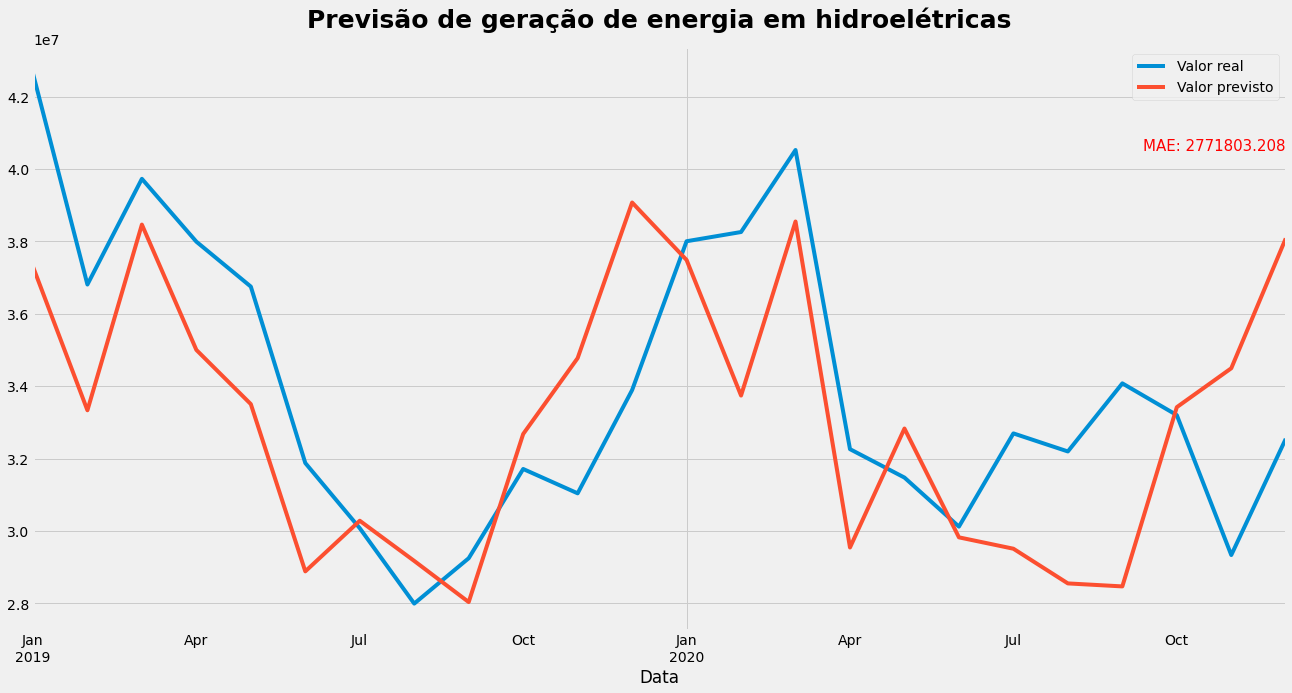

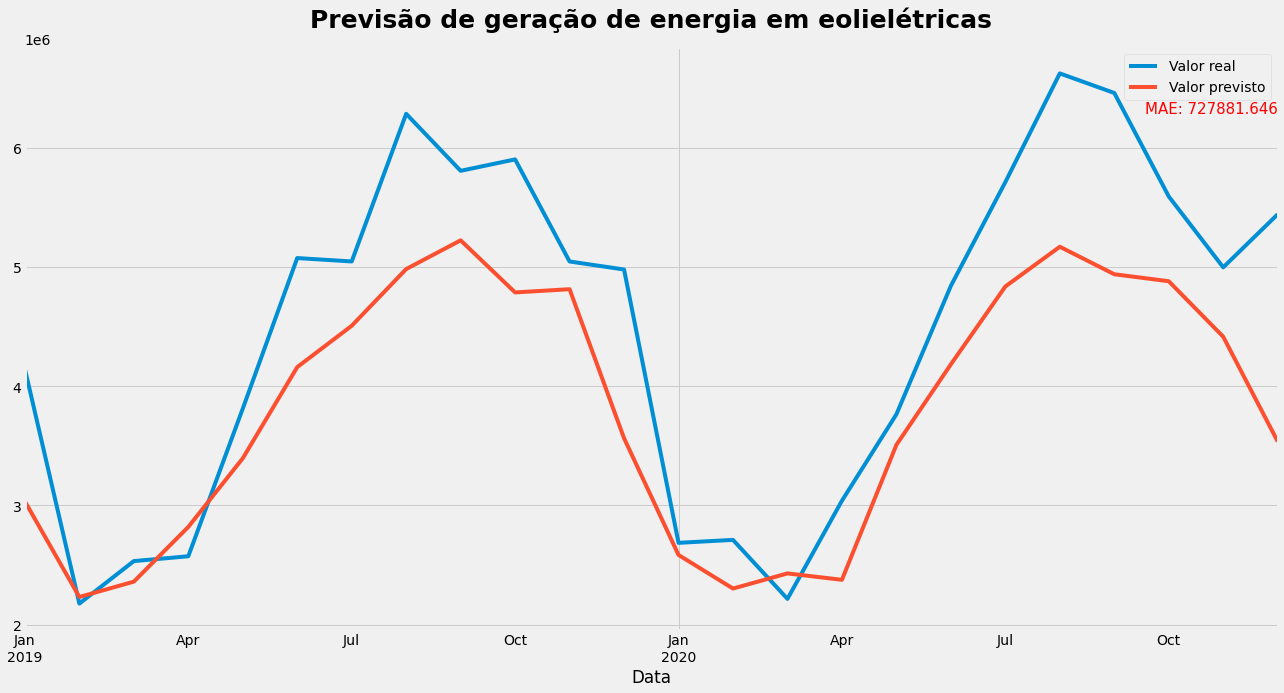

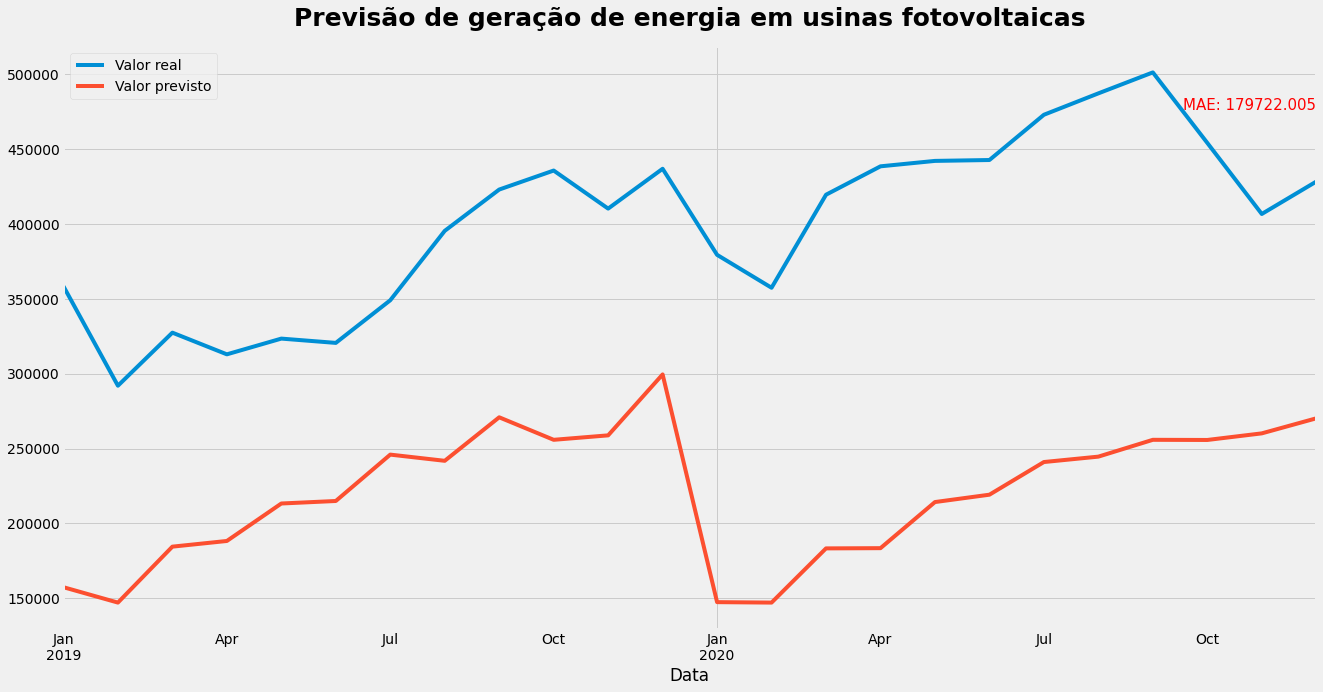

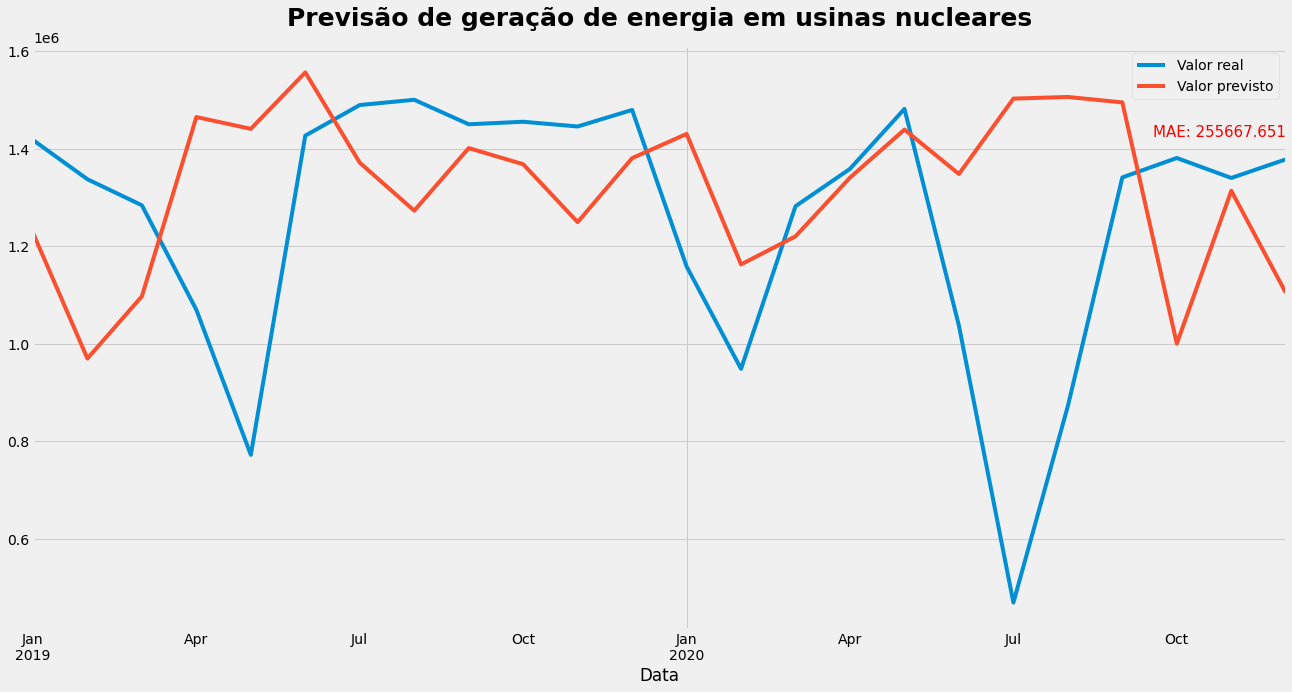

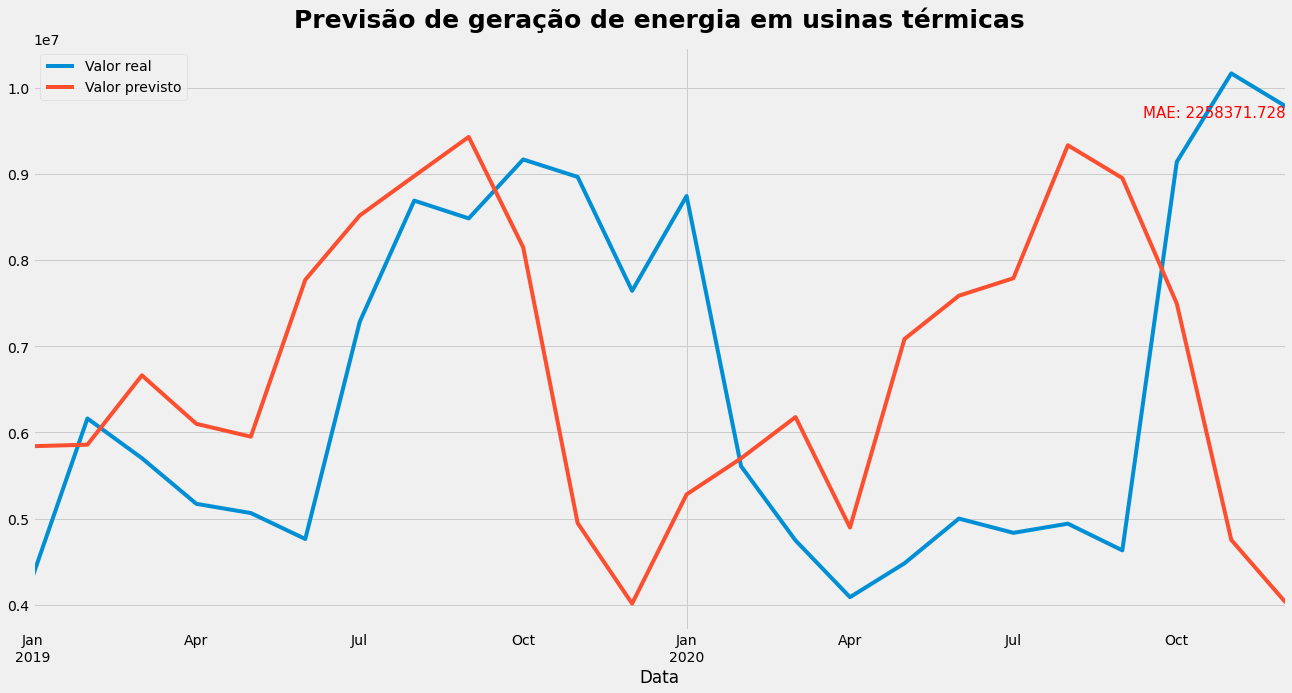

In [42]:
#HIDROELÉTRICA

# Calculando o MAE
mae_h = round(mean_absolute_error(y_test_h, xgb_pred_h), 3)

# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'y_test_h': y_test_h, 'xgb_pred_h': xgb_pred_h})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores reais e previstos
df_plot['y_test_h'].plot(label='Valor real')
df_plot['xgb_pred_h'].plot(label='Valor previsto')

# Ajustando a posição do texto com o MAE
plt.text(df_plot.index.max(), df_plot['y_test_h'].max() * 0.95, 'MAE: {}'.format(mae_h),
         fontsize=15, color='red', horizontalalignment='right')

# Ajustando o título
plt.title('Previsão de geração de energia em hidroelétricas', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

print('\n')

#EOLIELÉTRICA

# Calculando o MAE
mae_e = round(mean_absolute_error(y_test_e, xgb_pred_e), 3)

# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'y_test_e': y_test_e, 'xgb_pred_e': xgb_pred_e})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores reais e previstos
df_plot['y_test_e'].plot(label='Valor real')
df_plot['xgb_pred_e'].plot(label='Valor previsto')

# Ajustando a posição do texto com o MAE
plt.text(df_plot.index.max(), df_plot['y_test_e'].max() * 0.95, 'MAE: {}'.format(mae_e),
         fontsize=15, color='red', horizontalalignment='right')

# Ajustando o título
plt.title('Previsão de geração de energia em eolielétricas', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

print('\n')

#FOTOVOLTAICA

# Calculando o MAE
mae_f = round(mean_absolute_error(y_test_f, xgb_pred_f), 3)

# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'y_test_f': y_test_f, 'xgb_pred_f': xgb_pred_f})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores reais e previstos
df_plot['y_test_f'].plot(label='Valor real')
df_plot['xgb_pred_f'].plot(label='Valor previsto')

# Ajustando a posição do texto com o MAE
plt.text(df_plot.index.max(), df_plot['y_test_f'].max() * 0.95, 'MAE: {}'.format(mae_f),
         fontsize=15, color='red', horizontalalignment='right')

# Ajustando o título
plt.title('Previsão de geração de energia em usinas fotovoltaicas', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

print('\n')

#NUCLEAR

# Calculando o MAE
mae_n = round(mean_absolute_error(y_test_n, xgb_pred_n), 3)

# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'y_test_n': y_test_n, 'xgb_pred_n': xgb_pred_n})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores reais e previstos
df_plot['y_test_n'].plot(label='Valor real')
df_plot['xgb_pred_n'].plot(label='Valor previsto')

# Ajustando a posição do texto com o MAE
plt.text(df_plot.index.max(), df_plot['y_test_n'].max() * 0.95, 'MAE: {}'.format(mae_n),
         fontsize=15, color='red', horizontalalignment='right')

# Ajustando o título
plt.title('Previsão de geração de energia em usinas nucleares', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

print('\n')

#TÉRMICA

# Calculando o MAE
mae_t = round(mean_absolute_error(y_test_t, xgb_pred_t), 3)

# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'y_test_t': y_test_t, 'xgb_pred_t': xgb_pred_t})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores reais e previstos
df_plot['y_test_t'].plot(label='Valor real')
df_plot['xgb_pred_t'].plot(label='Valor previsto')

# Ajustando a posição do texto com o MAE
plt.text(df_plot.index.max(), df_plot['y_test_t'].max() * 0.95, 'MAE: {}'.format(mae_t),
         fontsize=15, color='red', horizontalalignment='right')

# Ajustando o título
plt.title('Previsão de geração de energia em usinas térmicas', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

In [43]:
# Metricas de avaliação do modelo

#HIDROELÉTRICA
metricas_h = []

Tipo_usina_h = 'Hidroelétricas'
MAE_h = metrics.mean_absolute_error(y_test_h, xgb_pred_h)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_h = mean_absolute_percentage_error(y_test_h, xgb_pred_h)
RMSE_h = np.sqrt(metrics.mean_squared_error(y_test_h, xgb_pred_h))

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

SMAPE_h = smape(y_test_h, xgb_pred_h)

metricas_h.append((Tipo_usina_h, MAE_h, RMSE_h, MAPE_h, SMAPE_h))

df_metricas_h = pd.DataFrame(metricas_h, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_h)

print('\n')

#EOLIELÉTRICA
metricas_e = []

Tipo_usina_e = 'Eolielétricas'
MAE_e = metrics.mean_absolute_error(y_test_e, xgb_pred_e)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_e = mean_absolute_percentage_error(y_test_e, xgb_pred_e)
RMSE_e = np.sqrt(metrics.mean_squared_error(y_test_e, xgb_pred_e))

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

SMAPE_e = smape(y_test_e, xgb_pred_e)

metricas_e.append((Tipo_usina_e, MAE_e, RMSE_e, MAPE_e, SMAPE_e))

df_metricas_e = pd.DataFrame(metricas_e, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_e)

print('\n')

#FOTOVOLTAICA
metricas_f = []

Tipo_usina_f = 'Fotovoltaicas'
MAE_f = metrics.mean_absolute_error(y_test_f, xgb_pred_f)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_f = mean_absolute_percentage_error(y_test_f, xgb_pred_f)
RMSE_f = np.sqrt(metrics.mean_squared_error(y_test_f, xgb_pred_f))

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

SMAPE_f = smape(y_test_f, xgb_pred_f)

metricas_f.append((Tipo_usina_f, MAE_f, RMSE_f, MAPE_f, SMAPE_f))

df_metricas_f = pd.DataFrame(metricas_f, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_f)

print('\n')

#NUCLEAR
metricas_n = []

Tipo_usina_n = 'Nuclear'
MAE_n = metrics.mean_absolute_error(y_test_n, xgb_pred_n)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_n = mean_absolute_percentage_error(y_test_n, xgb_pred_n)
RMSE_n = np.sqrt(metrics.mean_squared_error(y_test_n, xgb_pred_n))

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

SMAPE_n = smape(y_test_n, xgb_pred_n)

metricas_n.append((Tipo_usina_n, MAE_n, RMSE_n, MAPE_n, SMAPE_n))

df_metricas_n = pd.DataFrame(metricas_n, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_n)

print('\n')


#TÉRMICA
metricas_t = []

Tipo_usina_t = 'Térmica'
MAE_t = metrics.mean_absolute_error(y_test_t, xgb_pred_t)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_t = mean_absolute_percentage_error(y_test_t, xgb_pred_t)
RMSE_t = np.sqrt(metrics.mean_squared_error(y_test_t, xgb_pred_t))

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

SMAPE_t = smape(y_test_t, xgb_pred_t)

metricas_t.append((Tipo_usina_t, MAE_t, RMSE_t, MAPE_t, SMAPE_t))

df_metricas_t = pd.DataFrame(metricas_t, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_t)

       Tipo_usina          MAE          RMSE      MAPE     SMAPE
0  Hidroelétricas  2771803.208  3.300048e+06  8.133337  8.207743


      Tipo_usina           MAE           RMSE       MAPE      SMAPE
0  Eolielétricas  727881.64551  885716.450436  14.966554  16.533166


      Tipo_usina            MAE           RMSE       MAPE      SMAPE
0  Fotovoltaicas  179722.005266  186094.611552  44.620058  58.373732


  Tipo_usina            MAE           RMSE       MAPE     SMAPE
0    Nuclear  255667.651042  346832.248228  28.318096  21.64547


  Tipo_usina           MAE          RMSE       MAPE      SMAPE
0    Térmica  2.258372e+06  2.790893e+06  36.014438  34.210559


In [44]:
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [45]:
# Iniciando a aplicação do algoritmo FBProphet para verificar se é possível obter melhores resultados


# Criando novas bases. Uma com a coluna de Data e coluna com os valores de geração abaixo de 2019, e outra no mesmo formato
# porém com os dados depois de 2019, para ser usada posteriormente para avaliar o modelo.

#HIDROELÉTRICA
df_prophet_h = geracao_mes_tipousina_pivot[['Data', 'HIDROELÉTRICA']]
df_prophet_h_train = df_prophet_h[df_prophet_h['Data'].dt.year < 2019]
df_prophet_h_test = df_prophet_h[df_prophet_h['Data'].dt.year >= 2019]
# Alteração dos nomes das colunas para ficar de acordo com o padrão do algoritmo FBProphet
df_prophet_h_train = df_prophet_h_train.rename(columns={'Data': 'ds', 'HIDROELÉTRICA': 'y'})

#EOLIELÉTRICA
df_prophet_e = geracao_mes_tipousina_pivot[['Data', 'EOLIELÉTRICA']]
df_prophet_e_train = df_prophet_e[df_prophet_e['Data'].dt.year < 2019]
df_prophet_e_test = df_prophet_e[df_prophet_e['Data'].dt.year >= 2019]
df_prophet_e_train = df_prophet_e_train.rename(columns={'Data': 'ds', 'EOLIELÉTRICA': 'y'})

#FOTOVOLTAICA
df_prophet_f = geracao_mes_tipousina_pivot[['Data', 'FOTOVOLTAICA']]
df_prophet_f_train = df_prophet_f[df_prophet_f['Data'].dt.year < 2019]
df_prophet_f_test = df_prophet_f[df_prophet_f['Data'].dt.year >= 2019]
df_prophet_f_train = df_prophet_f_train.rename(columns={'Data': 'ds', 'FOTOVOLTAICA': 'y'})

#NUCLEAR
df_prophet_n = geracao_mes_tipousina_pivot[['Data', 'NUCLEAR']]
df_prophet_n_train = df_prophet_n[df_prophet_n['Data'].dt.year < 2019]
df_prophet_n_test = df_prophet_n[df_prophet_n['Data'].dt.year >= 2019]
df_prophet_n_train = df_prophet_n_train.rename(columns={'Data': 'ds', 'NUCLEAR': 'y'})

#TÉRMICA
df_prophet_t = geracao_mes_tipousina_pivot[['Data', 'TÉRMICA']]
df_prophet_t_train = df_prophet_t[df_prophet_t['Data'].dt.year < 2019]
df_prophet_t_test = df_prophet_t[df_prophet_t['Data'].dt.year >= 2019]
df_prophet_t_train = df_prophet_t_train.rename(columns={'Data': 'ds', 'TÉRMICA': 'y'})



In [46]:
# Criação dos modelos que representam o algoritmo, treinamento do modelo e criação da base de datas futuras que será usado
# pelo modelo para trazer os valores de previsão.

model_h = Prophet(interval_width=0.95)
model_h.fit(df_prophet_h_train)
datas_futuras_h = model_h.make_future_dataframe(periods=730, freq='MS')


model_e = Prophet(interval_width=0.95)
model_e.fit(df_prophet_e_train)
datas_futuras_e = model_e.make_future_dataframe(periods=730, freq='MS')


model_f = Prophet(interval_width=0.95)
model_f.fit(df_prophet_f_train)
datas_futuras_f = model_f.make_future_dataframe(periods=730, freq='MS')

model_n = Prophet(interval_width=0.95)
model_n.fit(df_prophet_n_train)
datas_futuras_n = model_n.make_future_dataframe(periods=730, freq='MS')

model_t = Prophet(interval_width=0.95)
model_t.fit(df_prophet_t_train)
datas_futuras_t = model_t.make_future_dataframe(periods=730, freq='MS')


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

In [47]:

# Nesta etapa são criadas as bases de dados contendo as datas como index, e as colunas com o valor da previsão e outra com 
# o valor real de geração

#HIDROELÉTRICA
previsao_h = model_h.predict(datas_futuras_h)
previsao_h = previsao_h[previsao_h['ds'].dt.year >= 2019]

previsao_h.rename(columns={'ds': 'Data'}, inplace=True)


previsao_h_prophet = pd.merge(previsao_h[['Data', 'yhat']], 
                     df_prophet_h_test[['Data', 'HIDROELÉTRICA']], 
                     on='Data', 
                     how='inner')

previsao_h_prophet.set_index('Data', inplace=True)


#EOLIELÉTRICA
previsao_e = model_e.predict(datas_futuras_e)
previsao_e = previsao_e[previsao_e['ds'].dt.year >= 2019]

previsao_e.rename(columns={'ds': 'Data'}, inplace=True)


previsao_e_prophet = pd.merge(previsao_e[['Data', 'yhat']], 
                     df_prophet_e_test[['Data', 'EOLIELÉTRICA']], 
                     on='Data', 
                     how='inner')

previsao_e_prophet.set_index('Data', inplace=True)


#FOTOVOLTAICA
previsao_f = model_f.predict(datas_futuras_f)
previsao_f = previsao_f[previsao_f['ds'].dt.year >= 2019]

previsao_f.rename(columns={'ds': 'Data'}, inplace=True)


previsao_f_prophet = pd.merge(previsao_f[['Data', 'yhat']], 
                     df_prophet_f_test[['Data', 'FOTOVOLTAICA']], 
                     on='Data', 
                     how='inner')

previsao_f_prophet.set_index('Data', inplace=True)

#NUCLEAR
previsao_n = model_n.predict(datas_futuras_n)
previsao_n = previsao_n[previsao_n['ds'].dt.year >= 2019]

previsao_n.rename(columns={'ds': 'Data'}, inplace=True)


previsao_n_prophet = pd.merge(previsao_n[['Data', 'yhat']], 
                     df_prophet_n_test[['Data', 'NUCLEAR']], 
                     on='Data', 
                     how='inner')

previsao_n_prophet.set_index('Data', inplace=True)


#TÉRMICA
previsao_t = model_t.predict(datas_futuras_t)
previsao_t = previsao_t[previsao_t['ds'].dt.year >= 2019]

previsao_t.rename(columns={'ds': 'Data'}, inplace=True)


previsao_t_prophet = pd.merge(previsao_t[['Data', 'yhat']], 
                     df_prophet_t_test[['Data', 'TÉRMICA']], 
                     on='Data', 
                     how='inner')

previsao_t_prophet.set_index('Data', inplace=True)




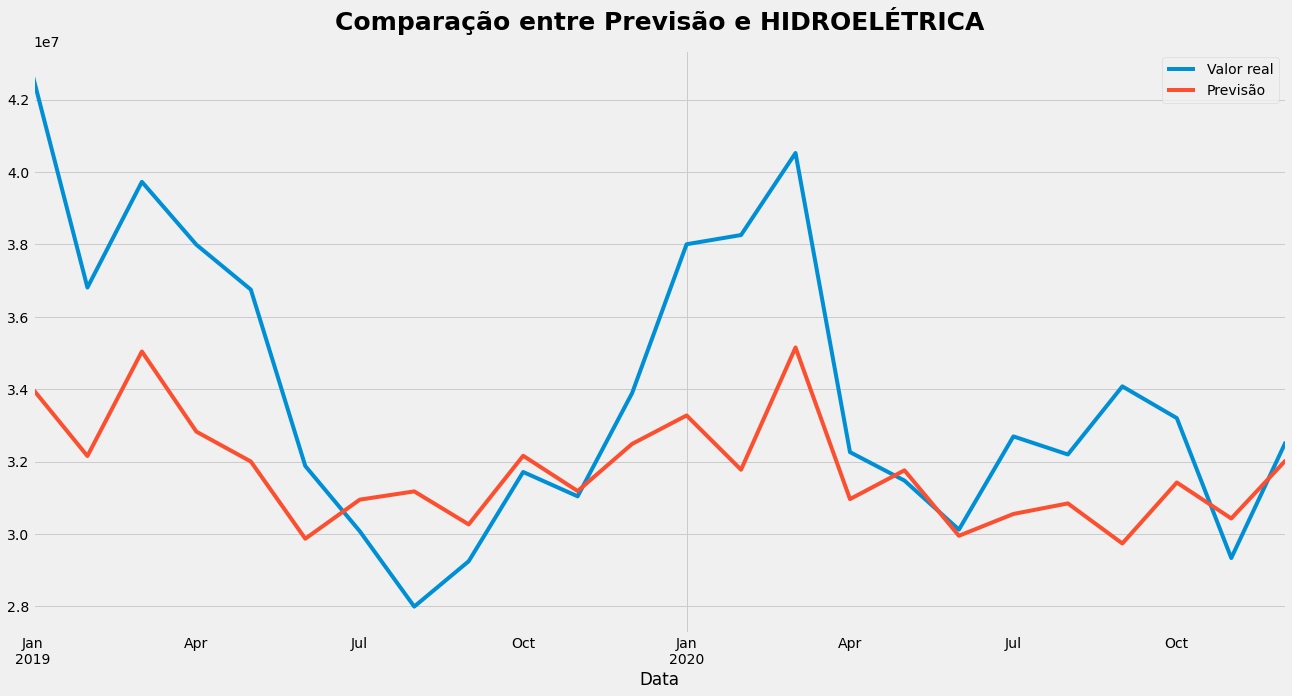

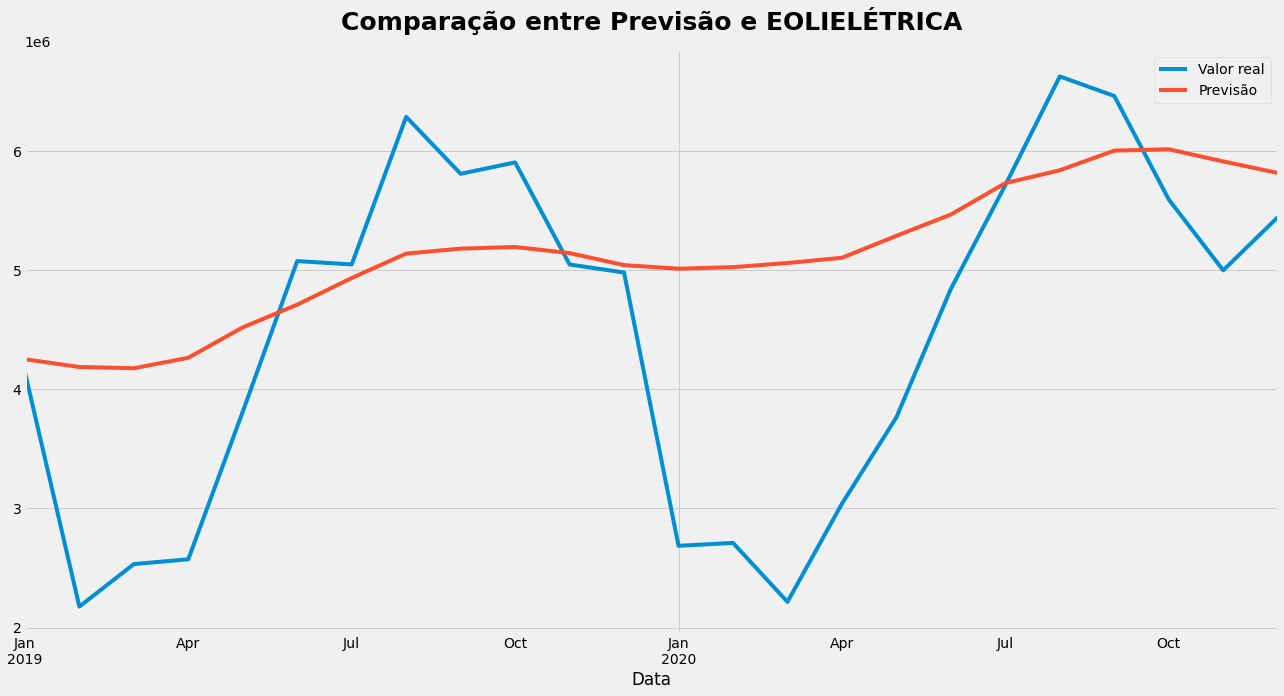

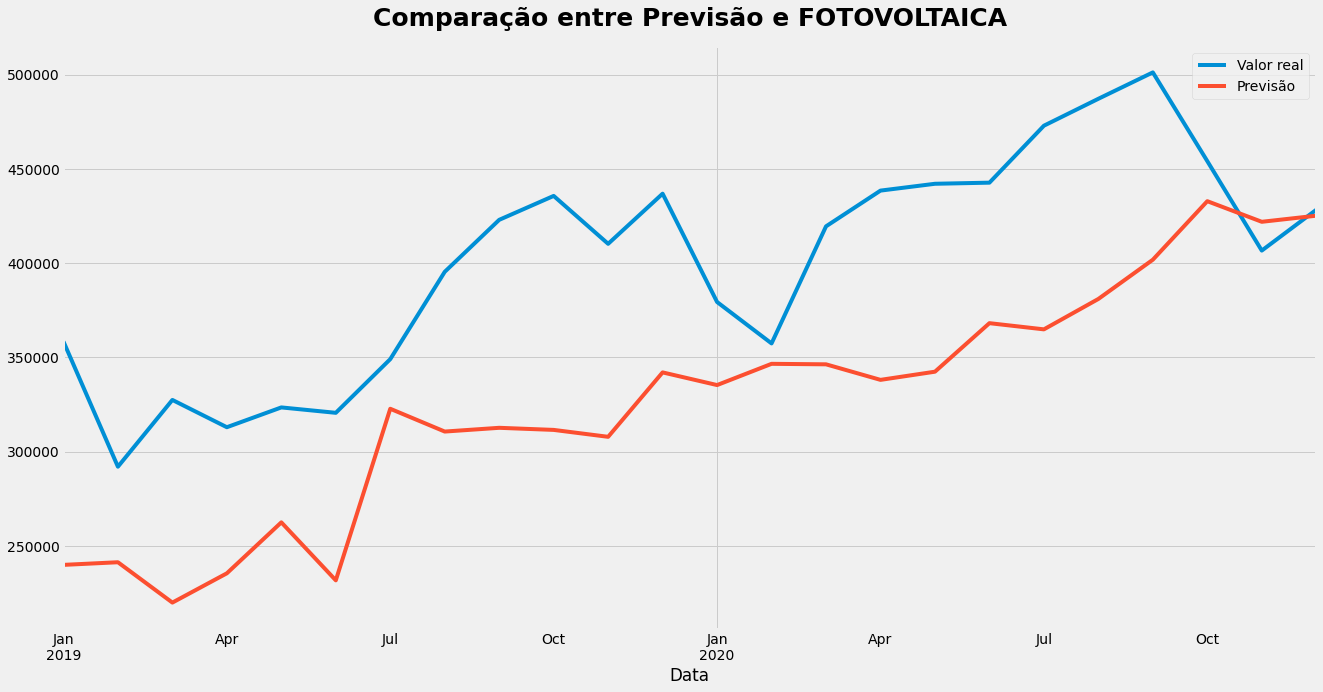

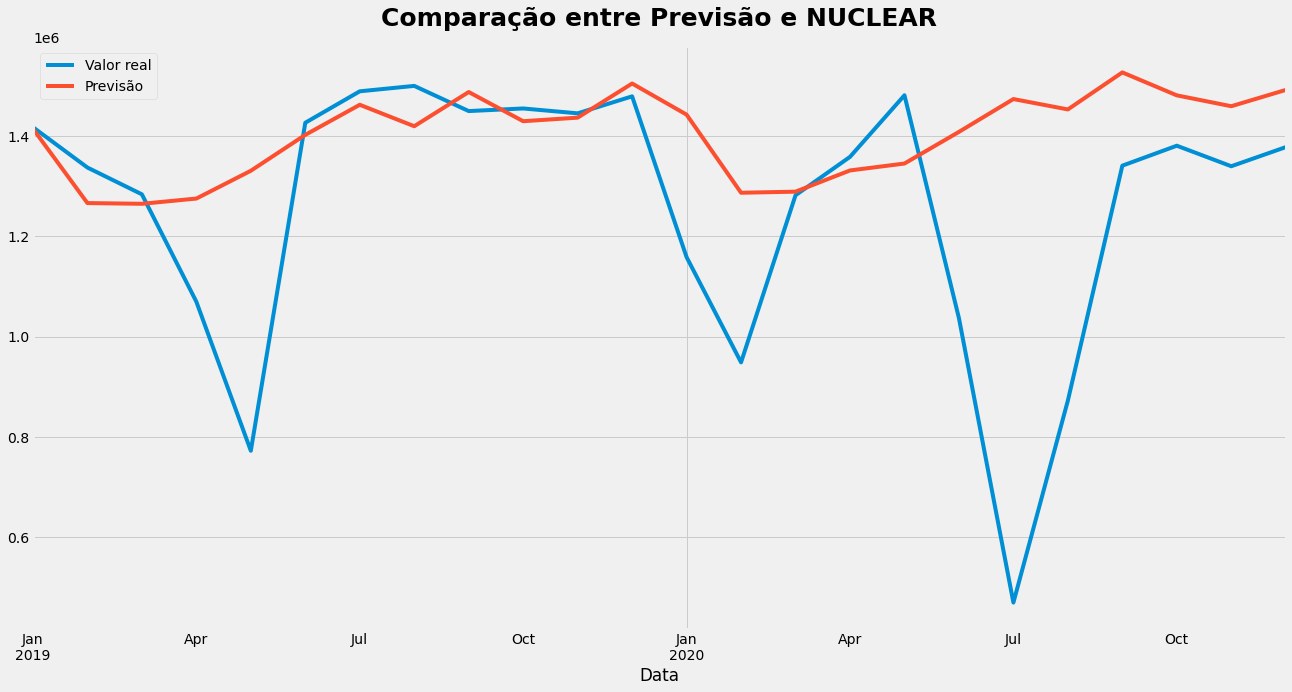

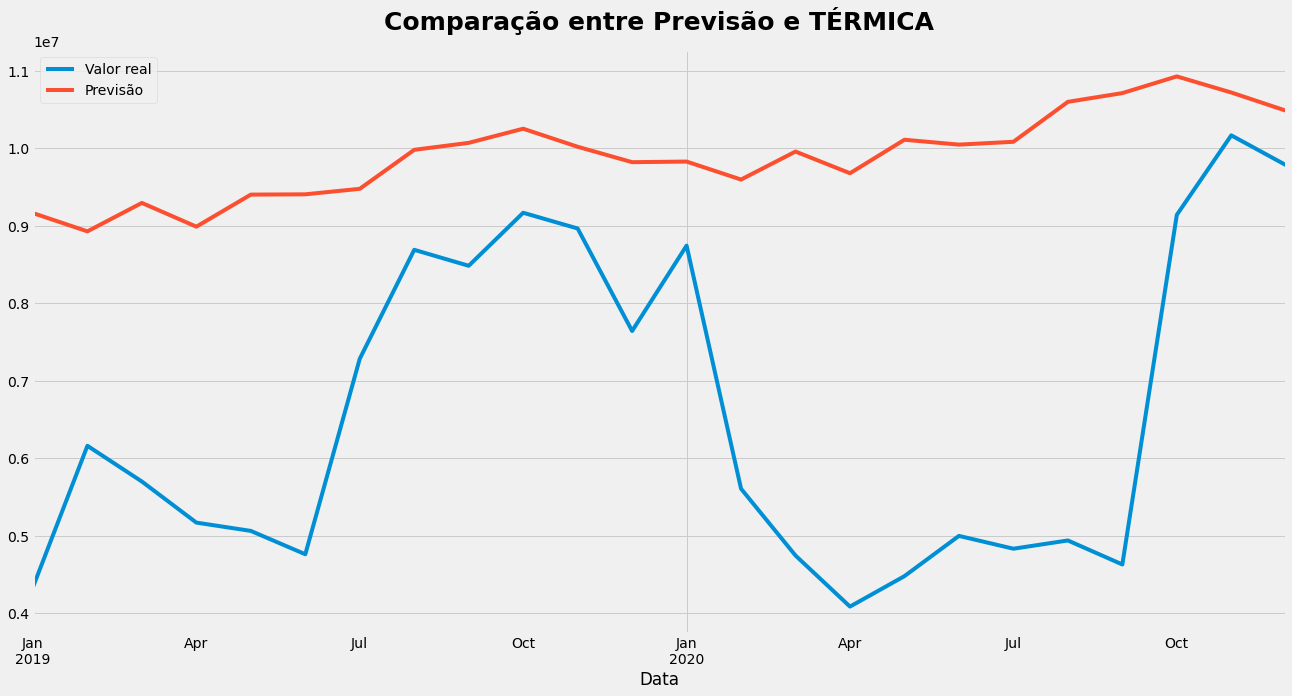

In [48]:
# Nesta etapa são plotados os gráficos de comparação entre os valores gerados pelo modelo e os valores reais.


#HIDROELÉTRICA
# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'Previsão': previsao_h_prophet['yhat'], 'Valor real': previsao_h_prophet['HIDROELÉTRICA']})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores da previsão e os valores reais 
df_plot['Valor real'].plot(label='Valor real')
df_plot['Previsão'].plot(label='Previsão')

# Ajustando o título
plt.title('Comparação entre Previsão e HIDROELÉTRICA', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()


print('\n')

#EOLIELÉTRICA
# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'Previsão': previsao_e_prophet['yhat'], 'Valor real': previsao_e_prophet['EOLIELÉTRICA']})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores da previsão e os valores reais 
df_plot['Valor real'].plot(label='Valor real')
df_plot['Previsão'].plot(label='Previsão')

# Ajustando o título
plt.title('Comparação entre Previsão e EOLIELÉTRICA', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()


print('\n')

#FOTOVOLTAICA
# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'Previsão': previsao_f_prophet['yhat'], 'Valor real': previsao_f_prophet['FOTOVOLTAICA']})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores da previsão e os valores reais 
df_plot['Valor real'].plot(label='Valor real')
df_plot['Previsão'].plot(label='Previsão')

# Ajustando o título
plt.title('Comparação entre Previsão e FOTOVOLTAICA', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

print('\n')

#NUCLEAR
# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'Previsão': previsao_n_prophet['yhat'], 'Valor real': previsao_n_prophet['NUCLEAR']})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores da previsão e os valores reais 
df_plot['Valor real'].plot(label='Valor real')
df_plot['Previsão'].plot(label='Previsão')

# Ajustando o título
plt.title('Comparação entre Previsão e NUCLEAR', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

print('\n')

#TÉRMICA
# Criando um DataFrame para plotagem
df_plot = pd.DataFrame({'Previsão': previsao_t_prophet['yhat'], 'Valor real': previsao_t_prophet['TÉRMICA']})

# Definindo o tamanho da figura
plt.figure(figsize=(20, 10))

# Plotando os valores da previsão e os valores reais 
df_plot['Valor real'].plot(label='Valor real')
df_plot['Previsão'].plot(label='Previsão')

# Ajustando o título
plt.title('Comparação entre Previsão e TÉRMICA', weight='bold', fontsize=25, pad=20)

# Adicionando a legenda
plt.legend()

# Exibindo o gráfico
plt.show()

In [49]:
# Criação das métricas para avaliação do modelo

#HIDROELÉTRICA
metricas_h = []

Tipo_usina_h = 'Hidroelétricas'

MAE_h = metrics.mean_absolute_error(previsao_h_prophet['HIDROELÉTRICA'], previsao_h_prophet['yhat'])
MAPE_h = mean_absolute_percentage_error(previsao_h_prophet['HIDROELÉTRICA'], previsao_h_prophet['yhat'])
RMSE_h = np.sqrt(metrics.mean_squared_error(previsao_h_prophet['HIDROELÉTRICA'], previsao_h_prophet['yhat']))
SMAPE_h = smape(previsao_h_prophet['HIDROELÉTRICA'], previsao_h_prophet['yhat'])

metricas_h.append((Tipo_usina_h, MAE_h, RMSE_h, MAPE_h, SMAPE_h))

df_metricas_h = pd.DataFrame(metricas_h, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_h)

print('\n')

#EOLIELÉTRICA
metricas_e = []

Tipo_usina_e = 'Eolielétricas'

MAE_e = metrics.mean_absolute_error(previsao_e_prophet['EOLIELÉTRICA'], previsao_e_prophet['yhat'])
MAPE_e = mean_absolute_percentage_error(previsao_e_prophet['EOLIELÉTRICA'], previsao_e_prophet['yhat'])
RMSE_e = np.sqrt(metrics.mean_squared_error(previsao_e_prophet['EOLIELÉTRICA'], previsao_e_prophet['yhat']))
SMAPE_e = smape(previsao_e_prophet['EOLIELÉTRICA'], previsao_e_prophet['yhat'])

metricas_e.append((Tipo_usina_e, MAE_e, RMSE_e, MAPE_e, SMAPE_e))

df_metricas_e = pd.DataFrame(metricas_e, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_e)

print('\n')

#FOTOVOLTAICA
metricas_f = []

Tipo_usina_f = 'Fotovoltaicas'

MAE_f = metrics.mean_absolute_error(previsao_f_prophet['FOTOVOLTAICA'], previsao_f_prophet['yhat'])
MAPE_f = mean_absolute_percentage_error(previsao_f_prophet['FOTOVOLTAICA'], previsao_f_prophet['yhat'])
RMSE_f = np.sqrt(metrics.mean_squared_error(previsao_f_prophet['FOTOVOLTAICA'], previsao_f_prophet['yhat']))
SMAPE_f = smape(previsao_f_prophet['FOTOVOLTAICA'], previsao_f_prophet['yhat'])

metricas_f.append((Tipo_usina_f, MAE_f, RMSE_f, MAPE_f, SMAPE_f))

df_metricas_f = pd.DataFrame(metricas_f, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_f)

print('\n')

#NUCLEAR
metricas_n = []

Tipo_usina_n = 'Nuclear'

MAE_n = metrics.mean_absolute_error(previsao_n_prophet['NUCLEAR'], previsao_n_prophet['yhat'])
MAPE_n = mean_absolute_percentage_error(previsao_n_prophet['NUCLEAR'], previsao_n_prophet['yhat'])
RMSE_n = np.sqrt(metrics.mean_squared_error(previsao_n_prophet['NUCLEAR'], previsao_n_prophet['yhat']))
SMAPE_n = smape(previsao_n_prophet['NUCLEAR'], previsao_n_prophet['yhat'])

metricas_n.append((Tipo_usina_n, MAE_n, RMSE_n, MAPE_n, SMAPE_n))

df_metricas_n = pd.DataFrame(metricas_n, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_n)

print('\n')

#TÉRMICA
metricas_t = []

Tipo_usina_t = 'Térmica'

MAE_t = metrics.mean_absolute_error(previsao_t_prophet['TÉRMICA'], previsao_t_prophet['yhat'])
MAPE_t = mean_absolute_percentage_error(previsao_t_prophet['TÉRMICA'], previsao_t_prophet['yhat'])
RMSE_t = np.sqrt(metrics.mean_squared_error(previsao_t_prophet['TÉRMICA'], previsao_t_prophet['yhat']))
SMAPE_t = smape(previsao_t_prophet['TÉRMICA'], previsao_t_prophet['yhat'])

metricas_t.append((Tipo_usina_t, MAE_t, RMSE_t, MAPE_t, SMAPE_t))

df_metricas_t = pd.DataFrame(metricas_t, columns=['Tipo_usina', 'MAE', 'RMSE', 'MAPE', 'SMAPE'])

print(df_metricas_t)


       Tipo_usina           MAE          RMSE     MAPE     SMAPE
0  Hidroelétricas  2.772078e+06  3.597725e+06  7.64931  8.066759


      Tipo_usina            MAE          RMSE       MAPE     SMAPE
0  Eolielétricas  998088.968681  1.296121e+06  32.151919  24.34747


      Tipo_usina           MAE          RMSE       MAPE      SMAPE
0  Fotovoltaicas  75121.441043  83482.481299  18.870933  21.368948


  Tipo_usina            MAE           RMSE       MAPE      SMAPE
0    Nuclear  181599.829451  298838.826212  22.548271  15.758216


  Tipo_usina           MAE          RMSE       MAPE      SMAPE
0    Térmica  3.331610e+06  3.808444e+06  63.966581  43.867712
